<a href="https://colab.research.google.com/github/Tanya806/DS_projects/blob/main/CAPM-stock_market_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Групповое задание по Бизнес-статистике
Участники группы:\
Владимир Добровольский,\
Татьяна Смирнова,\
Владимир Чудинов,\
Мария Гребенькова

Тема исследования:\
**Выделение систематического риска на фондовом рынке Российской федерации**


Project assignment: outline
Project assignment steps
Gather a team and pick a dataset
*   Maybe one of the Seminar or HA datasets: sports, project planning,
CAPM, demand prediction, height vs. weight...
*   Or a dataset you’re interested in yourself
*   Kaggle.com and https://archive.ics.uci.edu/datasets have many
*   Yahoo Finance is a good source for finance datasets
Afterwards, analyze your dataset in Python and write down a report in .ipynb format. Here are the expected components:


*   **Motivation (10 points)**

    You describe what you want to explore in your project and why

*   **Data dictionary (25 points)**

    You describe what your variables mean

*   **Regression analysis (25 points)**

    You estimate a regression model on your data and discuss the results

*   **Conclusions (15 points)**

    You discuss the limitations of your work and its relevance to broader context

**Project assignment: data dictionary**

For each variable in your dataset, give
*   Its codename in your dataset
*   Its precise meaning
*   Its data type (categorical or numerical)
*   If categorical, what each value means
*   If numerical, report the units of measurement


**For each variable, report its main summary statistics**

For numerical variables:
*   Min, max, mean, median
*   Number of missing variables
For categorical variables
*   Number of unique values
*   Most common value

You can also plot the key relationship of interest As a scatter plot, a line plot, or a histogram

**Project assignment: regression analysis**

Define your dependent variable and independent variable
* Estimate one or more regressions
* Report the coefficients and the R^2 value
* Comment on what you see
* (Maybe) Compare the out-of-sample performance of multiple models

**Project assignment: conclusion**

Finally, you conclude your project
• Explain what are the implications of your data analysis.
• What are the potential weakness of your analysis?
• How can it be extended/improved?

**Suggested timeline**
• This week: form a team and pick a dataset
• Describe the data dictionary and the data
• Next week: perform regression analysis
• The last week of December: conclusions and write-up

## Введение

Наше исследование посвящено систематическому фондовому риску в России. В основе исследования лежит регрессионная модель CAPM и её приложение на российском рынке. Исследование состоит из 4 относительно независимых частей:

1. **Лучший индикатор для CAPM**
2. **Структурные сдвиги на фондовом рынке**
3. **Зависимость изменений индекса MOEX**
4. **Влияние товарных и валютных индексов**

По итогу мы сформулировали несколько выводов, которые, на наш взгляд, могут быть полезны для инвестиционных аналитиков и финансистов.

In [ ]:
import numpy as np
import scipy.stats as ss
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
#Сюда загружаем файлы
!wget --show-progress --no-check-certificate 'https://docs.google.com/uc?export=download/&id=1gX3h7u8Viny7HoDwnXXYGeKd49XpvC7o' -O Data_all.xlsx
!wget --show-progress --no-check-certificate 'https://docs.google.com/uc?export=download/&id=19-IyKuegD_scFIHzDk_LUJWHMDnfvJMV' -O Add_Data.xlsx



--2024-12-26 18:57:54--  https://docs.google.com/uc?export=download/&id=1gX3h7u8Viny7HoDwnXXYGeKd49XpvC7o
Resolving docs.google.com (docs.google.com)... 142.251.2.100, 142.251.2.102, 142.251.2.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1gX3h7u8Viny7HoDwnXXYGeKd49XpvC7o&export=download/ [following]
--2024-12-26 18:57:54--  https://drive.usercontent.google.com/download?id=1gX3h7u8Viny7HoDwnXXYGeKd49XpvC7o&export=download/
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 501166 (489K) [application/octet-stream]
Saving to: ‘Data_all.xlsx’

Data_all.xlsx       100%[===================>] 489.42K  --.-KB/s    in

In [ ]:
data = pd.read_excel('Data_all.xlsx','data')
data.head(5)

TRADEDATE    IMOEX  MOEXTN   MOEXFN   MOEXCH   MOEXOG   MOEXMM   MOEXTL  \
0 2014-12-22  1437.08  662.45  4217.97  7797.50  3550.56  3457.24  1584.49   
1 2014-12-23  1398.20  664.16  4049.98  7789.55  3524.35  3329.61  1528.46   
2 2014-12-24  1401.50  661.19  4244.98  7719.43  3505.48  3338.37  1494.55   
3 2014-12-25  1408.54  659.62  4376.36  7675.87  3493.91  3305.26  1504.89   
4 2014-12-26  1417.80  657.22  4328.45  7713.71  3552.63  3354.27  1499.84   

    MOEXCN  MOEXIT  MOEXRE  ruonia   S&P500  sofr   usdrub  
0  5500.55     NaN     NaN  0.2336  3803.94  0.10  55.8000  
1  5547.86     NaN     NaN  0.1993  3810.78  0.08  54.5035  
2  5417.12     NaN     NaN  0.1837  3810.39  0.08  53.4400  
3  5468.19     NaN     NaN  0.1675      NaN   NaN  52.5515  
4  5569.08     NaN     NaN  0.1697  3823.00   NaN  54.0040

##Словарь данных

**Вы описываете, что означают Ваши переменные.**

1. **TRADEDATE**: Дата торговли

**Числовые данные Московской биржи в рублях:**
2. **IMOEX**: Индекс Московской биржи  
3. **MOEXTN**: Индекс MOEX TN (Транспорт)  
4. **MOEXFN**: Индекс MOEX FN (Финансовый сектор)  
5. **MOEXCH**: Индекс MOEX CH (Химия)  
6. **MOEXOG**: Индекс MOEX OG (Нефти и газа)  
7. **MOEXMM**: Индекс MOEX MM (Металлы и добыча)  
8. **MOEXTL**: Индекс MOEX TL (Телекоммуникации)  
9. **MOEXCN**: Индекс MOEX CN (Потребительский сектор)  
10. **MOEXIT**: Индекс MOEX IT (Информационные технологии)  
11. **MOEXRE**: Индекс MOEX RE (Строительных компаний)



12. **ruonia**: Процентная ставка RUONIA  — эталонная процентная ставка, представляющая собой взвешенную процентную ставку по необеспеченным межбанковским кредитам (депозитам) в рублях на условиях «овернайт». Измеряет стоимость денег (ликвидности) для банков на краткосрочном межбанковском рынке и позволяет оценивать состояние спроса на ликвидность и её предложения.
S&P 500 (Standard & Poor's 500)** — фондовый индекс, включающий 500 крупнейших по капитализации публичных компаний, торгуемых на фондовых биржах США.

13. **SOFR** (Secured Overnight Financing Rate) — эталонная процентная ставка на денежном рынке в долларах США, представляющая собой ставку, соответствующую медиане объёма транзакций трёх различных видов РЕПО на условиях «овернайт» под обеспечение государственными ценными бумагами Казначейства США.

14. **usdrub**: Курс USD/RUB — обменный курс доллара США к российскому рублю. До 11.06.24 это usdrub_tom на Московской бирже (цена закрытия), после — курс Центрального банка России (отсутствовали данных после 11.06.24. После введения санкций против московской биржи, торговля долларом прекратилась).

15. **_ret**: Логарифмические доходности соответствующих индексов.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Загрузка данных
data = pd.read_excel('Data_all.xlsx', 'data')
data = data.drop_duplicates()

# Описание числовых переменных
numerical_summary = data.describe().T  # Транспонируем для удобства
numerical_summary['Missing'] = data.isnull().sum()  # Количество пропусков
numerical_summary = numerical_summary[['min', 'max', 'mean', '25%', '50%', '75%', 'Missing']]
numerical_summary.columns = ['Min', 'Max', 'Mean', '25%', 'Median', '75%', 'Missing']

# Вывод в виде таблицы
print("Summary statistics for numerical variables:")
print(tabulate(numerical_summary, headers='keys', tablefmt='pretty'))

Summary statistics for numerical variables:
+-----------+----------------------+---------------------+-------------------------------+---------------------+---------------------+---------------------+---------+
|           |         Min          |         Max         |             Mean              |         25%         |       Median        |         75%         | Missing |
+-----------+----------------------+---------------------+-------------------------------+---------------------+---------------------+---------------------+---------+
| TRADEDATE | 2014-12-22 00:00:00  | 2024-12-18 00:00:00 | 2019-12-20 20:36:54.022140416 | 2017-06-21 12:00:00 | 2019-12-04 00:00:00 | 2022-07-07 12:00:00 |    0    |
|   IMOEX   |       1396.61        |       4287.52       |      2552.0658876588764       | 2043.2350000000001  |       2436.57       |       2997.62       |    0    |
|  MOEXTN   |        557.69        |       2509.98       |      1418.0125892490767       |       1109.0        |       14

In [ ]:
data_ret = data.copy()
for factor in data_ret.iloc[:, 2:11]:
  data_ret[factor+'_ret'] = np.log(data_ret[factor]/data_ret[factor].shift(1))

In [ ]:
# Описание датасета с доходностями индексов
numerical_summary_ret = data_ret.describe().T  # Транспонируем для удобства
numerical_summary_ret['Missing'] = data_ret.isnull().sum()  # Количество пропусков
numerical_summary_ret = numerical_summary_ret[['min', 'max', 'mean', '25%', '50%', '75%', 'Missing']]
numerical_summary_ret.columns = ['Min', 'Max', 'Mean', '25%', 'Median', '75%', 'Missing']
# result = mode(data.MOEXFN)

# Вывод в виде таблицы
print("Summary statistics for numerical variables with returns:")
print(tabulate(numerical_summary_ret, headers='keys', tablefmt='pretty'))

Summary statistics for numerical variables with returns:
+------------+----------------------+---------------------+-------------------------------+------------------------+------------------------+----------------------+---------+
|            |         Min          |         Max         |             Mean              |          25%           |         Median         |         75%          | Missing |
+------------+----------------------+---------------------+-------------------------------+------------------------+------------------------+----------------------+---------+
| TRADEDATE  | 2014-12-22 00:00:00  | 2024-12-18 00:00:00 | 2019-12-20 20:36:54.022140416 |  2017-06-21 12:00:00   |  2019-12-04 00:00:00   | 2022-07-07 12:00:00  |    0    |
|   IMOEX    |       1396.61        |       4287.52       |      2552.0658876588764       |   2043.2350000000001   |        2436.57         |       2997.62        |    0    |
|   MOEXTN   |        557.69        |       2509.98       |      141

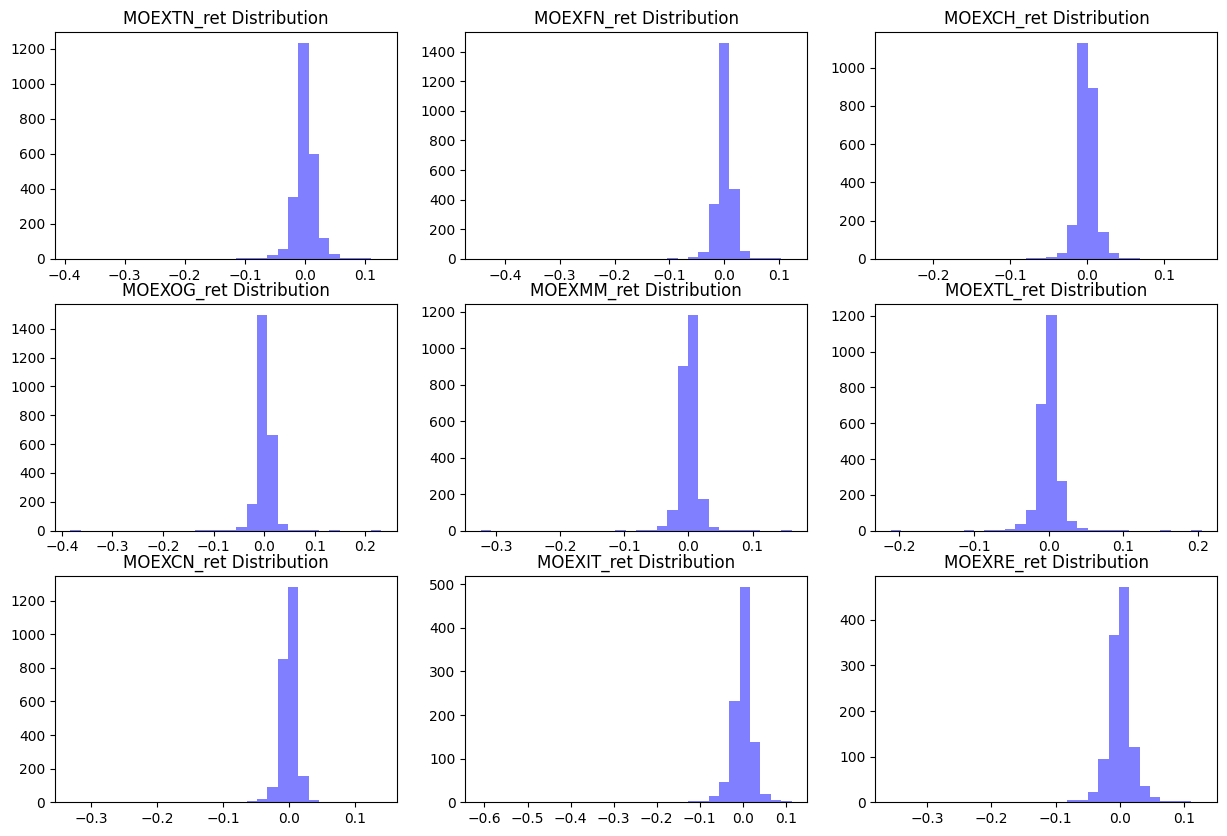

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))


axs[0, 0].hist(data_ret.MOEXTN_ret, bins=30, color='blue', alpha=0.5)
axs[0, 0].set_title('MOEXTN_ret Distribution')
axs[0, 1].hist(data_ret.MOEXFN_ret, bins=30, color='blue', alpha=0.5)
axs[0, 1].set_title('MOEXFN_ret Distribution')
axs[0, 2].hist(data_ret.MOEXCH_ret, bins=30, color='blue', alpha=0.5)
axs[0, 2].set_title('MOEXCH_ret Distribution')
axs[1, 0].hist(data_ret.MOEXOG_ret, bins=30, color='blue', alpha=0.5)
axs[1, 0].set_title('MOEXOG_ret Distribution')
axs[1, 1].hist(data_ret.MOEXMM_ret, bins=30, color='blue', alpha=0.5)
axs[1, 1].set_title('MOEXMM_ret Distribution')
axs[1, 2].hist(data_ret.MOEXTL_ret, bins=30, color='blue', alpha=0.5)
axs[1, 2].set_title('MOEXTL_ret Distribution')
axs[2, 0].hist(data_ret.MOEXCN_ret, bins=30, color='blue', alpha=0.5)
axs[2, 0].set_title('MOEXCN_ret Distribution')
axs[2, 1].hist(data_ret.MOEXIT_ret, bins=30, color='blue', alpha=0.5)
axs[2, 1].set_title('MOEXIT_ret Distribution')
axs[2, 2].hist(data_ret.MOEXRE_ret, bins=30, color='blue', alpha=0.5)
axs[2, 2].set_title('MOEXRE_ret Distribution')

plt.show()

In [ ]:
date_counts = data['TRADEDATE'].value_counts()
duplicate_dates = date_counts[date_counts > 1].index

duplicate_rows = data[data['TRADEDATE'].isin(duplicate_dates)]
print(duplicate_rows)

Empty DataFrame
Columns: [TRADEDATE, IMOEX, MOEXTN, MOEXFN, MOEXCH, MOEXOG, MOEXMM, MOEXTL, MOEXCN, MOEXIT, MOEXRE, ruonia, S&P500, sofr, usdrub]
Index: []


**Выводы по данным**

1. Данные охватывают **период с 22 декабря 2014 года по 18 декабря 2024 года** и содержат информацию о различных индексах Московской биржи, процентных ставках и курсе рубля к доллару США.

2. Для исследования структурного разрыва **до и после пандемии COVID-19 (Исследование 2) следует исключить индексы MOEXIT и MOEXRE**, так как данные по ним недоступны до начала пандемии (MOEXIT — до 25 декабря 2020 года, MOEXRE — до 20 марта 2020 года).

3. Пропуски в данных необходимо учитывать при построении регрессии. Для этого в функции ols можно использовать параметр missing='drop', который исключает строки с пропущенными значениями.

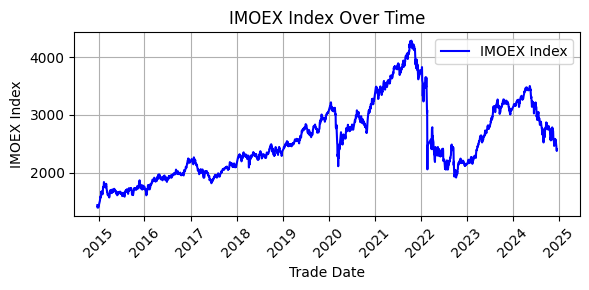

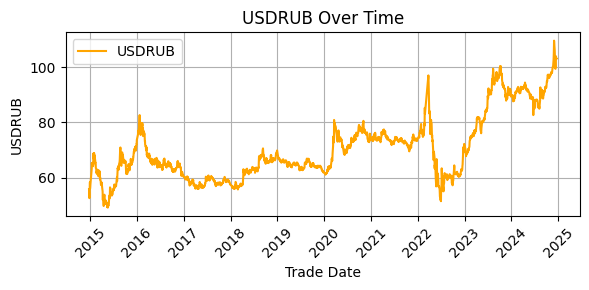

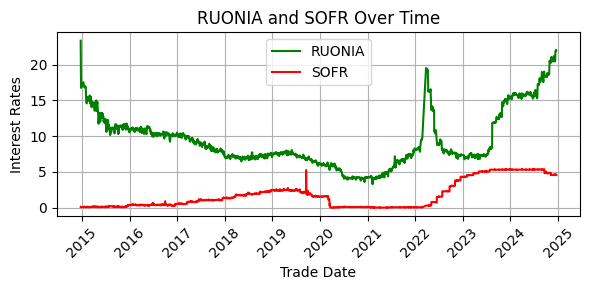

In [ ]:
# Визуализация IMOEX
plt.figure(figsize=(6, 3))
plt.plot(data['TRADEDATE'], data['IMOEX'], linestyle='-', label='IMOEX Index', color='blue')
plt.ylabel('IMOEX Index')
plt.xlabel('Trade Date')
plt.title('IMOEX Index Over Time')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Визуализация USDRUB
plt.figure(figsize=(6, 3))
plt.plot(data['TRADEDATE'], data['usdrub'], linestyle='-', label='USDRUB', color='orange')
plt.ylabel('USDRUB')
plt.xlabel('Trade Date')
plt.title('USDRUB Over Time')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Визуализация RUONIA и SOFR
plt.figure(figsize=(6, 3))
plt.plot(data['TRADEDATE'], data['ruonia']*100, linestyle='-', label='RUONIA', color='green')
plt.plot(data['TRADEDATE'], data['sofr'], linestyle='-', label='SOFR', color='red')
plt.ylabel('Interest Rates')
plt.xlabel('Trade Date')
plt.title('RUONIA and SOFR Over Time')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

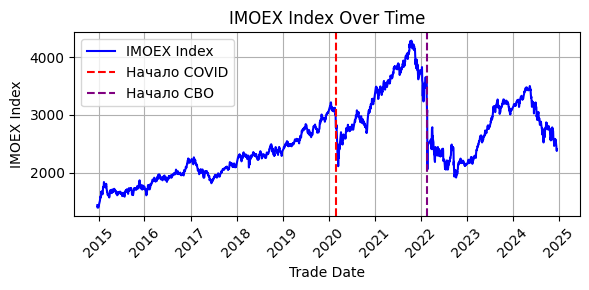

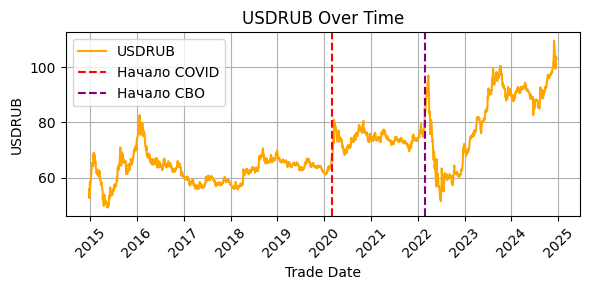

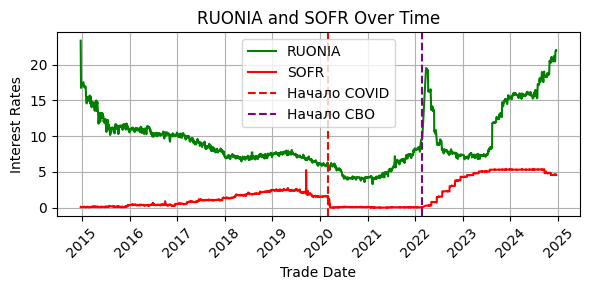

In [ ]:
# Визуализация IMOEX
plt.figure(figsize=(6, 3))
plt.plot(data['TRADEDATE'], data['IMOEX'], linestyle='-', label='IMOEX Index', color='blue')
plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='Начало COVID')
plt.axvline(pd.to_datetime('2022-02-24'), color='purple', linestyle='--', label='Начало СВО')
plt.ylabel('IMOEX Index')
plt.xlabel('Trade Date')
plt.title('IMOEX Index Over Time')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Визуализация USDRUB
plt.figure(figsize=(6, 3))
plt.plot(data['TRADEDATE'], data['usdrub'], linestyle='-', label='USDRUB', color='orange')
plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='Начало COVID')
plt.axvline(pd.to_datetime('2022-02-24'), color='purple', linestyle='--', label='Начало СВО')
plt.ylabel('USDRUB')
plt.xlabel('Trade Date')
plt.title('USDRUB Over Time')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Визуализация RUONIA и SOFR
plt.figure(figsize=(6, 3))
plt.plot(data['TRADEDATE'], data['ruonia']*100, linestyle='-', label='RUONIA', color='green')
plt.plot(data['TRADEDATE'], data['sofr'], linestyle='-', label='SOFR', color='red')
plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='Начало COVID')
plt.axvline(pd.to_datetime('2022-02-24'), color='purple', linestyle='--', label='Начало СВО')
plt.ylabel('Interest Rates')
plt.xlabel('Trade Date')
plt.title('RUONIA and SOFR Over Time')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


## Исcледование 1. Лучший индикатор для CAPM



При оценке инвестиционных проектов методом дисконтирования будущих денежных потоков ключевым входным параметром является ставка дисконтирования. Наиболее распространенным в корпоративных финансах подходом является использование модели CAPM (capital asset pricing model). В соответствии с ней, доходность, приходящаяся на акционера инвестиционного проекта, определяется по формуле:
$$
CoE = rf + β×mp
$$
где
$CoE$ - стоимость капитала акционера (ставка дисконтирования);\
$rf$ - безрисковая ставка;\
$β$ - чувствительность проекта к систематическому риску;\
$mp = y^m - rf$ - excess return фондового рынка над безрисковой ставкой.

Для оценки этих параметров часто используют фондовый рынок США:
безрисковая ставка в $, mp из индекса S&P500, а β определяют статистически.
Мы предполагаем, что для Российского рынка такой подход будет давать не лучшие результаты, и что для этих целей лучше подойдет локальный индикатор фондового рынка - индекс Московской биржы MOEX. Проверять свои гипотезы мы будем на отраслевых индексах, которые публикует Московская биржа, которые отражают динамику стоимости акций компаний конкретной отрасли.

Чтобы исследовать этот вопрос, проведем регрессию для каждого из отраслевых индексов по методике CAPM:
$$
y_t =α + rf_t + β(y^m_t - rf_t)
$$
где:\
$y_t$ - доходность отраслевого индекса в момент времени t. В регрессии на S&P500 будем использовать долларовую доходность, на MOEX - рублевую\
$rf_t$ - безрисковая ставка в момент времени t. В регрессии на S&P500 будем использовать Libor3M/SOFR, в регрессии на MOEX - RUONIA.\
$y^m_t$ - доходность индекса широкого рынка S&P500 или MOEX.

Для каждого отраслевого индекса оценим α и β и посмотрим на их статистическую значимость.
Сравнивать качество полученных регрессий будем через показатель $R^2$

In [ ]:
counts = data.index.value_counts()
duplicates = counts[counts > 1]
if len(duplicates) > 0:
    print("Индекс содержит дубликаты:")
    print(duplicates)
else:
    print("Индекс не содержит дубликаты.")


Индекс не содержит дубликаты.


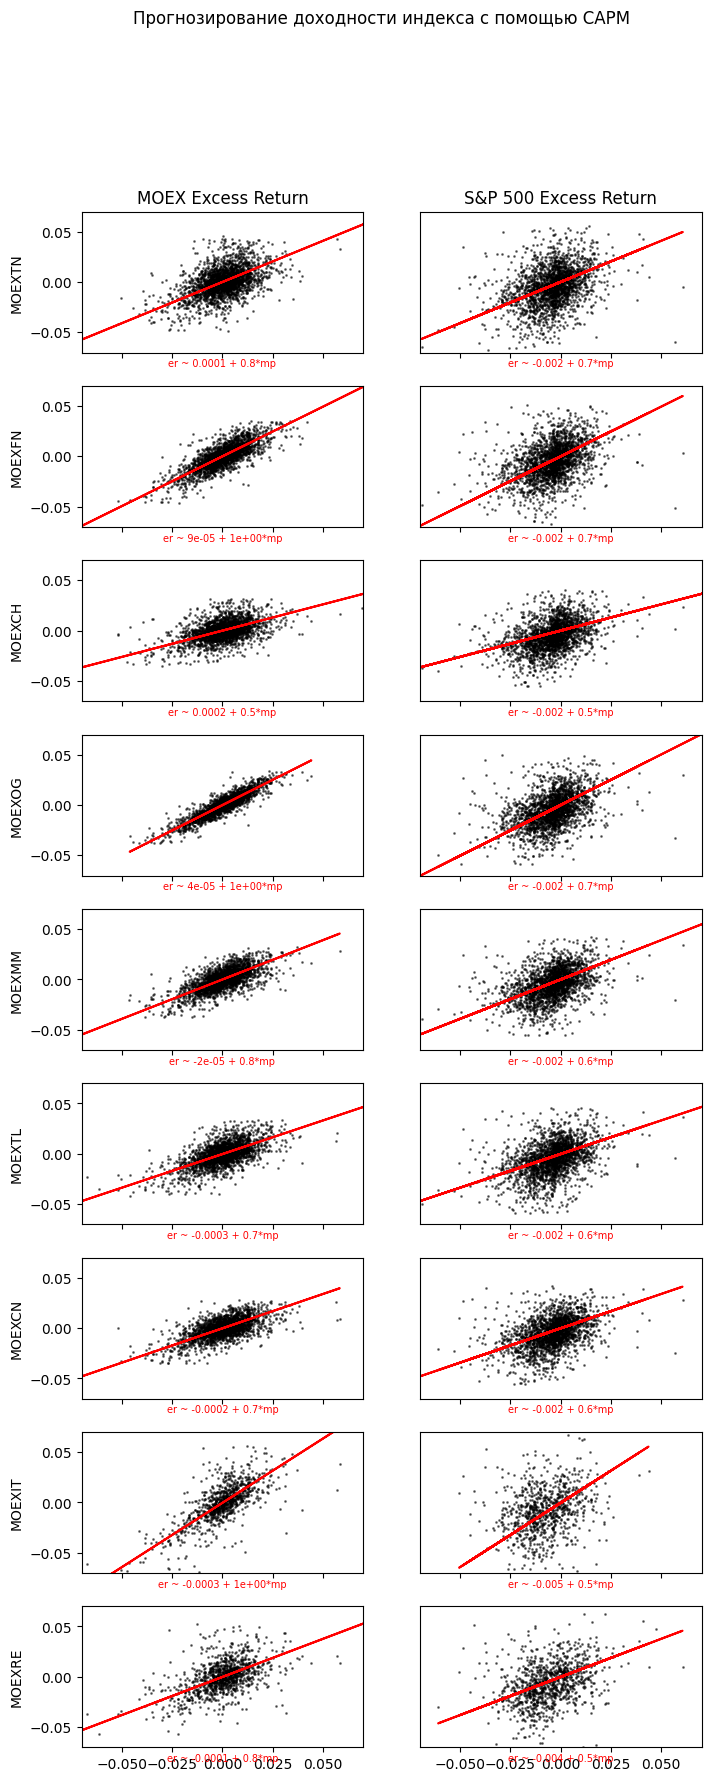

           alpha      beta alpha_pvalue beta_pvalue R_squared
MOEXTN  0.000115  0.819042     0.680515         0.0  0.465769
MOEXFN  0.000086  0.988862     0.619723         0.0  0.766382
MOEXCH  0.000154   0.52245     0.498249         0.0  0.348718
MOEXOG  0.000041  1.006781     0.697844         0.0   0.90257
MOEXMM -0.000025  0.782893     0.882561         0.0  0.684519
MOEXTL -0.000257    0.6686     0.243971         0.0  0.481009
MOEXCN -0.000164  0.682982     0.349687         0.0  0.606416
MOEXIT -0.000334  1.278673     0.521429         0.0  0.721297
MOEXRE -0.000118  0.758044     0.811822         0.0  0.437417


           alpha      beta alpha_pvalue beta_pvalue R_squared
MOEXTN -0.001688  0.680072      0.00116         0.0  0.118486
MOEXFN -0.001602  0.716259      0.00149         0.0   0.13653
MOEXCH   -0.0024  0.525625          0.0         0.0  0.110692
MOEXOG -0.001543  0.711002     0.000986         0.0  0.153023
MOEXMM -0.002002  0.644465     0.000002         0.0  0.155309
MOEXTL

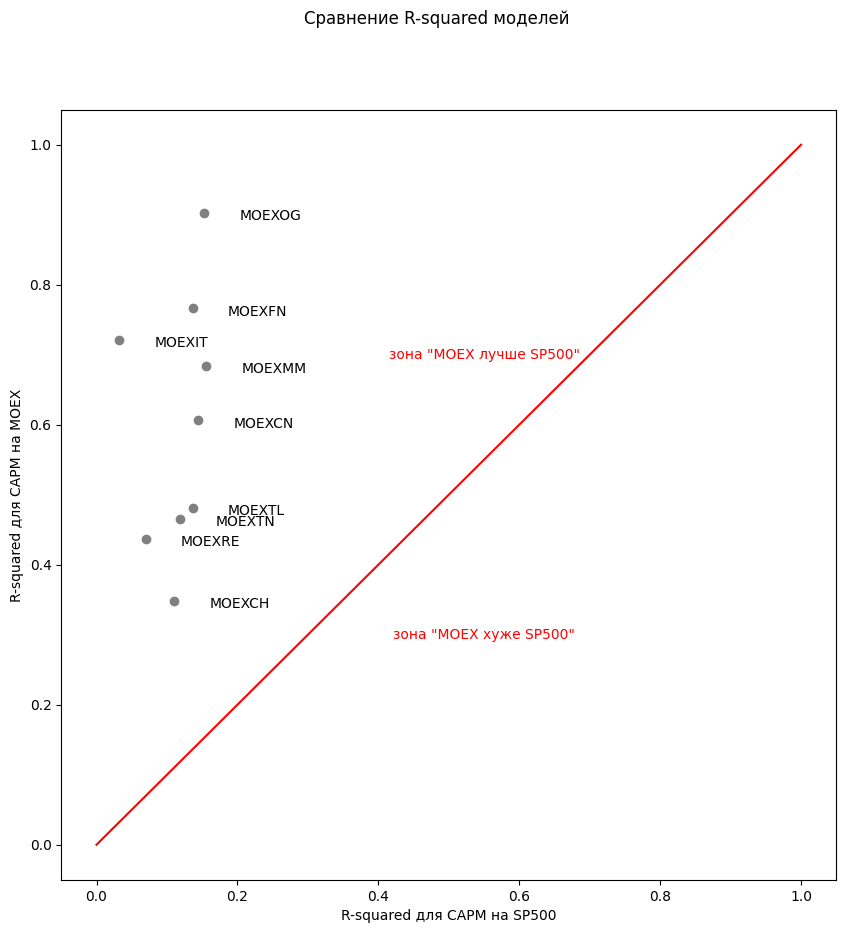

In [ ]:
#это список индексов, для которых будем рассчитывать регрессию по CAPM
idx = data.loc[:,'MOEXTN':'MOEXRE'].columns


#считаем excess return по рублевым ценам индексов и по MOEX
log_rub = np.log(data.loc[:,idx]) #логарифмы - best practice в деривативах
return_rub = log_rub.diff().loc[1:]
excess_rub = return_rub.sub(data.loc[1:,'ruonia']/365,axis=0)
mkt_rub = np.log(data.loc[:,'IMOEX']).diff().loc[1:] #excess return для рынка
mkt_rub_excess = mkt_rub.sub(data.loc[1:,'ruonia']/365,axis=0)

#аналогично считаем excess return по ценам индексов в USD и по S&P500
quote_usd = data.loc[:,idx].div(data.loc[:,'usdrub'],axis=0)
log_usd = np.log(quote_usd)
return_usd = log_usd.diff().loc[1:]
excess_usd = return_usd.sub(data.loc[1:,'sofr']/365,axis=0)
mkt_usd = np.log(data.loc[:,'S&P500']).diff().loc[1:]
mkt_usd_excess = mkt_usd.sub(data.loc[1:,'sofr']/365,axis=0)

#добавляем в dataframe переменную market premium
excess_rub['mp'] = mkt_rub_excess
excess_usd['mp'] = mkt_usd_excess

capm_rub = pd.DataFrame(None, index=idx, columns=['alpha',
                                                  'beta',
                                                  'alpha_pvalue',
                                                  'beta_pvalue',
                                                  'R_squared'])
capm_usd = capm_rub.copy()

fig, axes = plt.subplots(len(idx), 2, figsize=(8, 20), sharex=True)
fig.suptitle('Прогнозирование доходности индекса с помощью CAPM')

# Устанавливаем подписи осей x
axes[0,0].set_title('MOEX Excess Return')
axes[0,1].set_title('S&P 500 Excess Return')


# Отключаем оси y для правого столбца
for ax in axes[:, 1]:
    ax.set_yticks([])


for s in idx:
  #для каждой отрасли считаем регрессию и сохраняем её результаты в dataframe
  c_rub = smf.ols(f'{s} ~ mp', excess_rub,missing='drop').fit()
  capm_rub.loc[s,'alpha'] = c_rub.params['Intercept']
  capm_rub.loc[s,'beta'] = c_rub.params['mp']
  capm_rub.loc[s,'alpha_pvalue'] = c_rub.pvalues['Intercept']
  capm_rub.loc[s,'beta_pvalue'] = c_rub.pvalues['mp']
  capm_rub.loc[s,'R_squared'] = c_rub.rsquared

  #Отрисовываем график для MOEX
  almost_all = excess_rub.loc[(excess_rub[s]>=excess_rub[s].quantile(0.01))&
                           (excess_rub[s]<=excess_rub[s].quantile(0.99))]
  ax = axes[idx.get_loc(s), 0]
  ax.set_ylabel(s)
  ax.set_ylim(-0.07, 0.07)
  ax.set_xlim(-0.07, 0.07)
  ax.scatter(almost_all['mp'],almost_all[s],color = "black", s = 1, alpha = 0.5)
  ax.plot(almost_all['mp'], c_rub.predict(almost_all['mp']),color='red')
  axtext = f'er ~ {capm_rub.loc[s,"alpha"]:.00} + {capm_rub.loc[s,"beta"]:.00}*mp'
  ax.text(0.5, -0.1, axtext, ha="center", transform=ax.transAxes,color='red',
          fontsize=7)

  ax.set_aspect(0.5)


  #то же самое с котировками в USD
  c_usd = smf.ols(f'{s} ~ mp', excess_usd,missing='drop').fit()
  capm_usd.loc[s,'alpha'] = c_usd.params['Intercept']
  capm_usd.loc[s,'beta'] = c_usd.params['mp']
  capm_usd.loc[s,'alpha_pvalue'] = c_usd.pvalues['Intercept']
  capm_usd.loc[s,'beta_pvalue'] = c_usd.pvalues['mp']
  capm_usd.loc[s,'R_squared'] = c_usd.rsquared

  #Отрисовываем график для S&P500
  almost_all = excess_usd.loc[(excess_usd[s]>=excess_usd[s].quantile(0.01))&
                           (excess_usd[s]<=excess_usd[s].quantile(0.99))]
  ax = axes[idx.get_loc(s), 1]
  ax.set_ylim(-0.07, 0.07)
  ax.set_xlim(-0.07, 0.07)
  ax.scatter(almost_all['mp'],almost_all[s],color = "black", s = 1, alpha = 0.5)
  ax.plot(almost_all['mp'], c_rub.predict(almost_all['mp']),color='red')
  axtext = f'er ~ {capm_usd.loc[s,"alpha"]:.00} + {capm_usd.loc[s,"beta"]:.00}*mp'
  ax.text(0.5, -0.1, axtext, ha="center", transform=ax.transAxes,color='red',
          fontsize=7)
  #ax.set_aspect("equal")
  ax.set_aspect(0.5)
# Рисуем таблицу графиков
plt.show()

#Результаты расчетов модели

print(capm_rub)
print()
print()
print(capm_usd)

# откладываем на графике R^2
# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('Cравнение R-squared моделей')
# Создаем диагональную линию
ax.plot([0, 1], [0, 1], color='red')

# Располагаем текст диагонально
ax.text(0.55, 0.7, 'зона "MOEX лучше SP500"', rotation=0, ha='center', va='center',color = 'red')
ax.text(0.55, 0.3, 'зона "MOEX хуже SP500"', rotation=0, ha='center', va='center',color = 'red')

# Откладываем точки и подписываем их индексами
for i, (x, y) in enumerate(zip(capm_usd.loc[:,'R_squared'], capm_rub.loc[:,'R_squared'])):
    ax.scatter(x, y, color='gray')
    ax.annotate(idx[i], (x, y), xytext=(x+0.05, y-0.01))

# Настраиваем оси и легенду
ax.set_xlabel('R-squared для CAPM на SP500')
ax.set_ylabel('R-squared для CAPM на MOEX')
#ax.legend()
#копируем для дальнейшей работы
capm_rub_for_portfolio = capm_rub.copy()
# Показываем график
plt.show()

**Вывод**

Для каждого отраслевого индекса мы зафиттили регрессионную модель на MOEX и на S&P500. На первой группе графиков мы отразили значения доходностей индекса (по оси y) и соответвующую доходность фондового рынка (по оси x). красной линией мы нарисовали прогноз от соответствующей модели.
Визуально на этих графиках видно, что в левом столбце (регрессия на MOEX) облако значений более вытянуто вдоль линии предсказания, что свидетельствует о **более высокой предсказательной силе регрессии на MOEX по сравнению с регрессией на S&P500**.

В таблице под графиками мы напечатали оценки регрессий и их статистическую значимость.
Здесь следует обратить внимание на pvalue для свободного члена alpha: считается, что на эффективном рынке α=0. C учетом высоких значений pvalue **регрессия на MOEX не позволяет сделать вывод о том, что хотя бы у одного отраслевого индекса имеется статистически значимая α. Для регрессии на S&P500 для нескольких индексов α - статистически значима**, что противоречит эффективности рынка. Мы предполагаем, что это связано с неполной открытостью Российского фондового рынка и наличия дополнительных премий за риск со стороны международных инвесторов в отношении Российских активов.

На последнем графике по оси x мы отложили показатель $R^2$ регрессии на S&P500, а по оси y - $R^2$ регрессии на MOEX. Если точка расположена выше главной диагонали, значит **регрессия на MOEX имеет более высокую предсказательную силу, чем на S&P500.**

**Для всех индексом MOEX оказался более качественным предиктором, чем S&P500.** Исходя из этого мы делаем главный вывод о том, что CAPM для инвестиционных проектов в Российской федерации следует оценивать исходя из CAPM, построенной на основе российского индекса фондового рынка - MOEX.


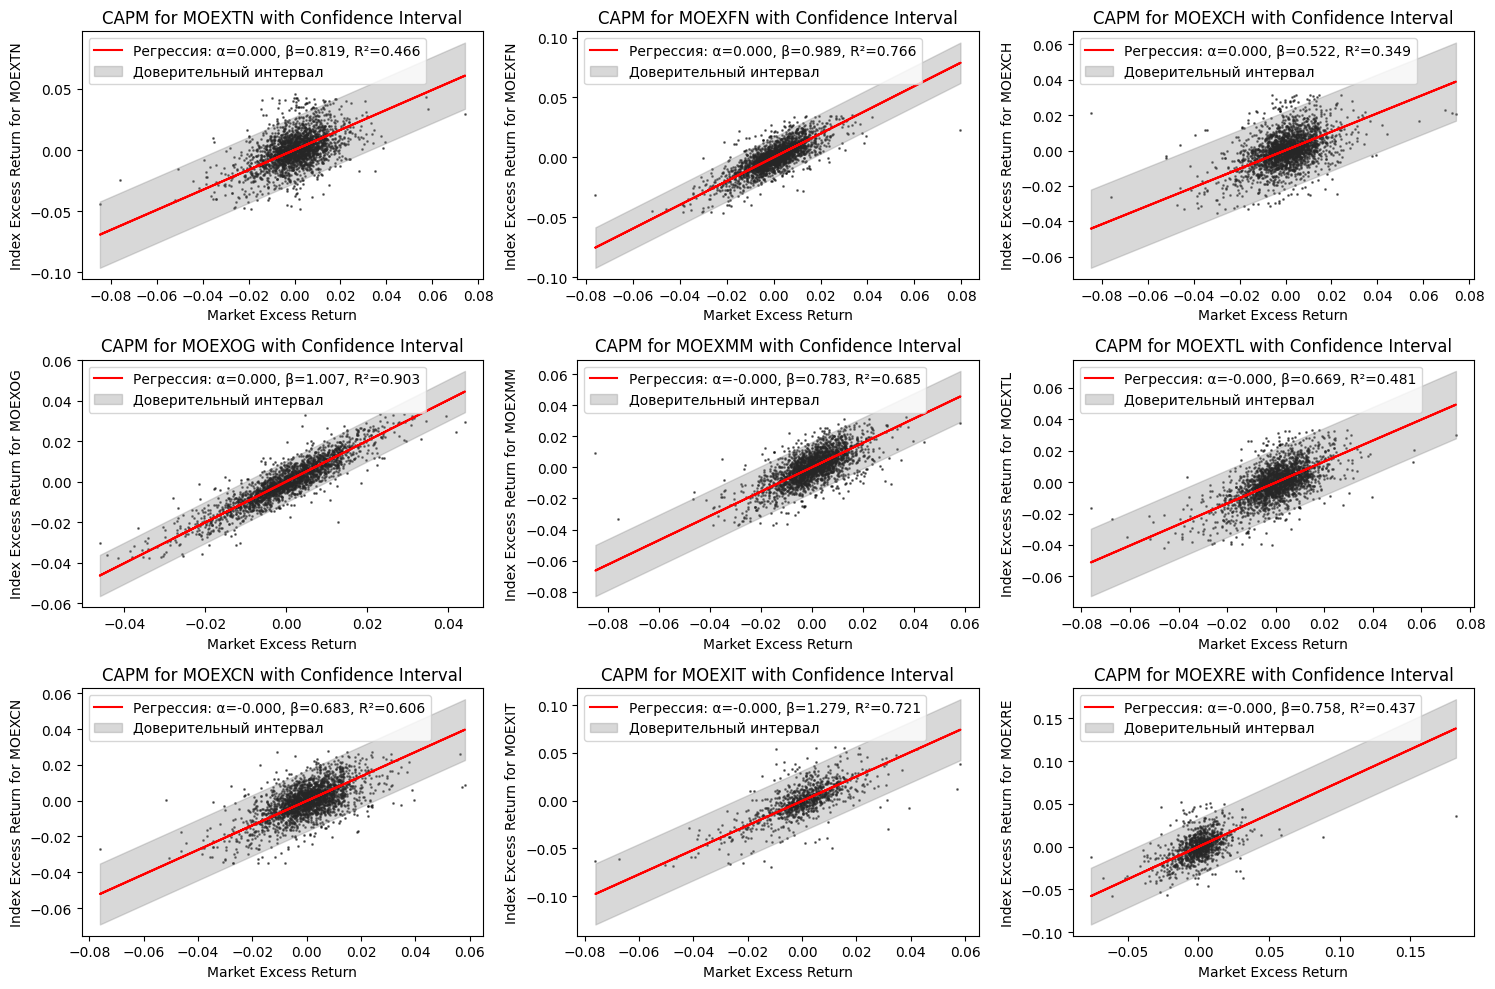

In [ ]:

# Подготовка графиков
num_plots = len(idx)
num_cols = 3  # Количество столбцов
num_rows = (num_plots + num_cols - 1) // num_cols  # Количество строк, чтобы разместить все графики

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))  # Увеличиваем размер для лучшей видимости
axs = axs.flatten()  # Упрощаем доступ к осям

for i, s in enumerate(idx):
    # Фильтрация данных
    almost_all = excess_rub.loc[(excess_rub[s] >= excess_rub[s].quantile(0.01)) &
                                 (excess_rub[s] <= excess_rub[s].quantile(0.99))]

    # Предсказания и доверительные интервалы
    predictions = smf.ols(f'{s} ~ mp', excess_rub,missing='drop').fit().get_prediction(almost_all['mp'])
    pred_int = predictions.summary_frame(alpha=0.05)

    model = smf.ols(f'{s} ~ mp', excess_rub, missing='drop').fit()
    alpha = model.params['Intercept']
    beta = model.params['mp']
    r_squared = model.rsquared

    # Построение графика
    axs[i].scatter(almost_all['mp'], almost_all[s], color="black", s=1, alpha=0.5)
    axs[i].plot(almost_all['mp'], smf.ols(f'{s} ~ mp', excess_rub,missing='drop').fit().predict(almost_all['mp']), color='red', label=f'Регрессия: α={alpha:.3f}, β={beta:.3f}, R²={r_squared:.3f}')
    # Доверительный интервал
    axs[i].fill_between(almost_all['mp'].sort_values(),
                        pred_int['obs_ci_lower'][almost_all['mp'].argsort()],
                        pred_int['obs_ci_upper'][almost_all['mp'].argsort()],
                        color='gray', alpha=0.3, label='Доверительный интервал')

    axs[i].set_xlabel('Market Excess Return')
    axs[i].set_ylabel(f'Index Excess Return for {s}')
    axs[i].set_title(f'CAPM for {s} with Confidence Interval')  # Заголовок меняется для каждого индекса
    axs[i].legend()

# Удаляем пустые подграфики, если они есть
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axs[j])

plt.tight_layout()  # Автоматическая подгонка для предотвращения наложения
plt.show()


После того, как мы убедились в том, что для регрессий лучше использовать MOEX, мы посмотрели на каждую модель и убедились, что качество этих моделей существенно различается от отрасли к отрасли. В частности, **индекс нефти и газа MOEXOG имеет довольно узкий доверительный интервал и высокий показатель R-squared - 0.9** С другой стороны, **индекс химии MOEXCH имеет широкий доверительный интервал и скромный показатель R-sqared - 0.39.**

Это навело нас на мысли о том, что качество регрессий можно улучшить. О дальнейших шагах - в Исследованиях 2-4


## Исследование 2. Структурные сдвиги на Фондовом рынке в 2020 и в 2022 годах



После того как мы определились с тем, что MOEX является наилучшим показателем для CAPM на российском фондовом рынке, мы решили проанализировать, менялись ли оценки β отраслевых индексов в ситуации кризисов или структурных сдвигов.
За последние 10 лет мы обозначили два основных события и решили проверить, изменились ли коэффициенты CAPM для отраслевых индексов после того, как наступил COVID19, а также после начала СВО.

Для этого, мы добавили порядковые переменные post_covid и crisis_2022 в набор данных, и сделали регрессии с учетом этих переменных.

**Новые переменные в Исследовании 2 ниже**

* **post_covid** - бинарный индикатор, который принимает значение 0 для наблюдений до 1 марта 2020 года (до начала пандемии COVID-19 в России) и значение 1 для наблюдений после этой даты (включая период пандемии и после).


* **crisis_2022** - бинарный индикатор, который принимает значение 0 для наблюдений до 24 февраля 2022 года (до начала военных действий в Украине) и значение 1 для наблюдений после этой даты (включая период военных действий и после).

Мы выбрали для себя 2 критерия существенности этих событий:
1. $R^2_{adj}$ регрессии с этими переменными существенно отличается от регрессии $R^2_{adj}$ без них;
2. $\beta$ акций на периоде до событий существенно отличается от $\beta$ на периоде - после  

In [ ]:
# Создание переменной post_covid
data['post_covid'] = (data['TRADEDATE'] >= '2020-03-01').astype(int)
data['crisis_22'] = (data['TRADEDATE'] >= '2022-02-24').astype(int)

**MOEXIT и MOEXRE не будем рассматривать в исследовании** ниже, так как эти индексы рассчитываются сравнительно недавно и по ним нет данных до Covid.

Чтобы проверить, есть ли **структурный разрыв на начало пандемии Covid**, мы можем использовать тест на структурный разрыв (structural break test) с уровнем значимости 5%. Один из наиболее распространенных тестов на структурный разрыв - **тест Чоу (Chow test)**

In [ ]:
#это список индексов, для которых будем рассчитывать регрессию по CAPM
idx = data.loc[:,'MOEXTN':'MOEXCN'].columns

capm_rub_covid = pd.DataFrame(None, index=idx, columns=['alpha',
                                                  'beta',
                                                  'alpha_pvalue',
                                                  'beta_pvalue',
                                                  'post_covid',
                                                  'mp:post_covid',
                                                  'pvalue_post_covid',
                                                  'pvalue_mp:post_covid',
                                                  'R_squared'])

#считаем excess return по рублевым ценам индексов и по MOEX
log_rub = np.log(data.loc[:,idx]) #логарифмы - best practice в деривативах
return_rub = log_rub.diff().loc[1:]
excess_rub = return_rub.sub(data.loc[1:,'ruonia']/365,axis=0)
mkt_rub = np.log(data.loc[:,'IMOEX']).diff().loc[1:] #excess return для рынка
mkt_rub_excess = mkt_rub.sub(data.loc[1:,'ruonia']/365,axis=0)


#добавляем в dataframe переменную market premium
excess_rub['mp'] = mkt_rub_excess

excess_rub['post_covid'] = (data['TRADEDATE'] >= '2020-03-01').astype(int)
excess_rub['crisis_22'] = (data['TRADEDATE'] >= '2022-02-24').astype(int)

# Словарь для хранения p-value теста Чоу для каждой модели
chow_test_results_covid = {}

for s in idx:
  #для каждой отрасли считаем регрессию и сохраняем её результаты в dataframe
  c_rub = smf.ols(f'{s} ~ mp + post_covid + mp:post_covid', excess_rub,missing='drop').fit()
  # Выполнение теста Чоу

  chow_test_covid = c_rub.f_test('post_covid = mp:post_covid = 0')
  #print(f'{s} : p-value = {chow_test.pvalue:.4f}')
  chow_test_results_covid[s] = chow_test_covid.pvalue  # Сохраняем p-value в словарь

  capm_rub_covid.loc[s,'alpha'] = c_rub.params['Intercept']
  capm_rub_covid.loc[s,'beta'] = c_rub.params['mp']
  capm_rub_covid.loc[s,'alpha_pvalue'] = c_rub.pvalues['Intercept']
  capm_rub_covid.loc[s,'beta_pvalue'] = c_rub.pvalues['mp']

  capm_rub_covid.loc[s, 'post_covid'] = c_rub.params['post_covid']
  capm_rub_covid.loc[s, 'mp:post_covid'] = c_rub.params['mp:post_covid']
  capm_rub_covid.loc[s,'pvalue_post_covid'] = c_rub.pvalues['post_covid']
  capm_rub_covid.loc[s,'pvalue_mp:post_covid'] = c_rub.pvalues['mp:post_covid']

  capm_rub_covid.loc[s,'R_squared'] = c_rub.rsquared

  #Здесь нужно отрисовать график для регрессии на MOEX


#Результаты расчетов модели
print()
print('Результаты расчетов модели:')
print()
print(capm_rub_covid)

print()
print('p-value теста Чоу для проверки, есть ли структурный разрыв на начало пандемии Covid:')
print()
for index, p_value in chow_test_results_covid.items():
    print(f'{index} : p-value = {p_value:.4f}')


Результаты расчетов модели:

           alpha      beta alpha_pvalue beta_pvalue post_covid mp:post_covid  \
MOEXTN  0.000237  0.507694     0.531233         0.0  -0.000131      0.403177   
MOEXFN   -0.0001  0.870084     0.675401         0.0   0.000437       0.15422   
MOEXCH   0.00018  0.382872     0.563774         0.0        0.0      0.180797   
MOEXOG  0.000063  0.982323       0.6623         0.0  -0.000038       0.03165   
MOEXMM  0.000107  0.705371     0.647437         0.0  -0.000244      0.100209   
MOEXTL -0.000191  0.740119     0.531134         0.0  -0.000167      -0.09278   
MOEXCN -0.000335  0.441897      0.15359         0.0   0.000457       0.31266   

       pvalue_post_covid pvalue_mp:post_covid R_squared  
MOEXTN          0.810964                  0.0  0.485625  
MOEXFN          0.204876                  0.0  0.769826  
MOEXCH          0.999284                  0.0  0.356064  
MOEXOG           0.85779             0.047801  0.902728  
MOEXMM          0.468522             0.

**Выводы по стуктурному разрыву "до и после пандемии":**

1. **Статистически значимые результаты (p-value < 0.05):**

  MOEXTN, MOEXFN, MOEXCH, MOEXMM, MOEXTL, MOEXCN: Для этих индексов p-value значительно ниже 0.05, что указывает на наличие статистически значимого структурного разрыва. Это означает, что влияние рыночных факторов на доходность этих индексов изменилось после начала пандемии.

2. **Не статистически значимый результат (p-value >= 0.05):**

  MOEXOG: p-value = 0.1368, что указывает на отсутствие статистически значимого структурного разрыва. Это может означать, что влияние рыночных факторов на доходность индекса MOEXOG (нефть и газ) не изменилось существенно после начала пандемии. Этот сектор оказался более устойчивым к изменениям, вызванным пандемией.

Кроме того, анализ результатов регрессионной модели с учетом структурного разрыва, вызванного пандемией Covid-19, показал, что **коэффициенты при переменной post_covid не являются статистически значимыми** (pvalue_post_covid > 0.05).

Однако, **коэффициенты при взаимодействии mp:post_covid оказались статистически значимыми** (исключая MOEXOG). Это может означать, что после начала пандемии инвесторы начали по-новому воспринимать риски и возможности, что отразилось на их реакциях на изменения в рыночной среде.

В частности, для индекса MOEXTN (транспорт) наблюдается значительное снижение бета-коэффициента с 0.819 без структурного разрыва до 0.51 «до пандемии» и 0.98 (0.51 + 0.47) «после начала пандемии». Это указывает на то, что **пандемия как систематический риск оказала более сильное влияние на сектор транспорта, чем на другие сектора.** Рынок упал из-за паники, а транспортные компании столкнулись с дополнительными ограничениями, что привело к повышенной чувствительности их доходности к рыночным колебаниям.

В то же время, в секторе телекоммуникаций (MOEXTL) наблюдается обратная тенденция. Несмотря на общий спад рынка, интернет-кинотеатры и другие компании на базе телекоммуникаций увеличили свою активность, что привело к снижению корреляции с рыночными изменениями.

Это подчеркивает, что **разные сектора экономики по-разному реагируют на кризисные ситуации, и их чувствительность к систематическим рискам может изменяться в зависимости от внешних факторов.**

In [ ]:
#crisis 2022 - до и после военных действий на Украине

# Это список индексов, для которых будем рассчитывать регрессию по CAPM, исключая MOEXOG, MOEXIT и MOEXRE, так как по ним mp:post_covid следует исключить. Будут рассмотрены отдельно
idx = data.loc[:, 'MOEXTN':'MOEXCN'].drop('MOEXOG', axis=1).columns

capm_rub_crisis = pd.DataFrame(None, index=idx, columns=['alpha',
                                                  'beta',
                                                  'alpha_pvalue',
                                                  'beta_pvalue',
                                                  'mp:post_covid',
                                                  'pvalue_mp:post_covid',
                                                  'R_squared'])

#считаем excess return по рублевым ценам индексов и по MOEX
log_rub = np.log(data.loc[:,idx]) #логарифмы - best practice в деривативах
return_rub = log_rub.diff().loc[1:]
excess_rub = return_rub.sub(data.loc[1:,'ruonia']/365,axis=0)
mkt_rub = np.log(data.loc[:,'IMOEX']).diff().loc[1:] #excess return для рынка
mkt_rub_excess = mkt_rub.sub(data.loc[1:,'ruonia']/365,axis=0)


#добавляем в dataframe переменную market premium
excess_rub['mp'] = mkt_rub_excess

excess_rub['post_covid'] = (data['TRADEDATE'] >= '2020-03-01').astype(int)
excess_rub['crisis_22'] = (data['TRADEDATE'] >= '2022-02-24').astype(int)

# Словарь для хранения p-value теста Чоу для каждой модели
chow_test_results_crisis = {}

for s in idx:
  #для каждой отрасли считаем регрессию и сохраняем её результаты в dataframe
  c_rub = smf.ols(f'{s} ~ mp + mp:post_covid + crisis_22 + mp:crisis_22', excess_rub,missing='drop').fit()
  # Выполнение теста Чоу

  chow_test_crisis = c_rub.f_test('crisis_22 = mp:crisis_22 = 0')
  #print(f'{s} : p-value = {chow_test.pvalue:.4f}')
  chow_test_results_crisis[s] = chow_test_crisis.pvalue  # Сохраняем p-value в словарь

  capm_rub_crisis.loc[s,'alpha'] = c_rub.params['Intercept']
  capm_rub_crisis.loc[s,'beta'] = c_rub.params['mp']
  capm_rub_crisis.loc[s,'alpha_pvalue'] = c_rub.pvalues['Intercept']
  capm_rub_crisis.loc[s,'beta_pvalue'] = c_rub.pvalues['mp']

  capm_rub_crisis.loc[s, 'mp:post_covid'] = c_rub.params['mp:post_covid']
  capm_rub_crisis.loc[s,'pvalue_mp:post_covid'] = c_rub.pvalues['mp:post_covid']

  capm_rub_crisis.loc[s, 'crisis_22'] = c_rub.params['crisis_22']
  capm_rub_crisis.loc[s,'pvalue_crisis_22'] = c_rub.pvalues['crisis_22']

  capm_rub_crisis.loc[s, 'mp:crisis_22'] = c_rub.params['mp:crisis_22']
  capm_rub_crisis.loc[s,'pvalue_mp:crisis_22'] = c_rub.pvalues['mp:crisis_22']

  capm_rub_crisis.loc[s,'R_squared'] = c_rub.rsquared

  #Здесь нужно отрисовать график для регрессии на MOEX


#Результаты расчетов модели
print()
print('Результаты расчетов модели:')
print()
print(capm_rub_crisis)

print()
print('p-value теста Чоу для проверки, есть ли структурный разрыв на начало военных действий в Украине:')
print()
for index, p_value in chow_test_results_crisis.items():
    print(f'{index} : p-value = {p_value:.4f}')


Результаты расчетов модели:

           alpha      beta alpha_pvalue beta_pvalue mp:post_covid  \
MOEXTN -0.000027  0.508352     0.933876         0.0      0.299847   
MOEXFN  0.000011  0.869809      0.95734         0.0      0.145754   
MOEXCH  0.000435  0.382236     0.099774         0.0      0.044022   
MOEXMM  0.000256  0.704999     0.192986         0.0     -0.031964   
MOEXTL -0.000332  0.740471     0.199759         0.0     -0.191569   
MOEXCN -0.000198  0.441555     0.315468         0.0      0.150043   

       pvalue_mp:post_covid R_squared  crisis_22  pvalue_crisis_22  \
MOEXTN                  0.0  0.488145   0.000753          0.216488   
MOEXFN              0.00001  0.769772   0.000354          0.356806   
MOEXCH              0.30541  0.364116  -0.000870          0.082198   
MOEXMM             0.316525  0.693161  -0.000911          0.014302   
MOEXTL             0.000006  0.485845   0.000250          0.610360   
MOEXCN             0.000003  0.639315   0.000340          0.362045

In [ ]:
#crisis 2022

# Создаем новый список индексов, включая только MOEXOG, MOEXIT и MOEXRE
idx2 = data.loc[:, ['MOEXOG', 'MOEXIT', 'MOEXRE']].columns

capm_rub_crisis2 = pd.DataFrame(None, index=idx2, columns=['alpha',
                                                  'beta',
                                                  'alpha_pvalue',
                                                  'beta_pvalue',

                                                  'R_squared'])

#считаем excess return по рублевым ценам индексов и по MOEX
log_rub = np.log(data.loc[:,idx2]) #логарифмы - best practice в деривативах
return_rub = log_rub.diff().loc[1:]
excess_rub = return_rub.sub(data.loc[1:,'ruonia']/365,axis=0)
mkt_rub = np.log(data.loc[:,'IMOEX']).diff().loc[1:] #excess return для рынка
mkt_rub_excess = mkt_rub.sub(data.loc[1:,'ruonia']/365,axis=0)


#добавляем в dataframe переменную market premium
excess_rub['mp'] = mkt_rub_excess

excess_rub['post_covid'] = (data['TRADEDATE'] >= '2020-03-01').astype(int)
excess_rub['crisis_22'] = (data['TRADEDATE'] >= '2022-02-24').astype(int)

# Словарь для хранения p-value теста Чоу для каждой модели
chow_test_results_crisis2 = {}

for s in idx2:
  #для каждой отрасли считаем регрессию и сохраняем её результаты в dataframe
  c_rub = smf.ols(f'{s} ~ mp + mp:post_covid + crisis_22 + mp:crisis_22', excess_rub,missing='drop').fit()
  # Выполнение теста Чоу

  chow_test_crisis2 = c_rub.f_test('crisis_22 = mp:crisis_22 = 0')
  #print(f'{s} : p-value = {chow_test.pvalue:.4f}')
  chow_test_results_crisis2[s] = chow_test_crisis2.pvalue  # Сохраняем p-value в словарь

  capm_rub_crisis2.loc[s,'alpha'] = c_rub.params['Intercept']
  capm_rub_crisis2.loc[s,'beta'] = c_rub.params['mp']
  capm_rub_crisis2.loc[s,'alpha_pvalue'] = c_rub.pvalues['Intercept']
  capm_rub_crisis2.loc[s,'beta_pvalue'] = c_rub.pvalues['mp']

  capm_rub_crisis2.loc[s, 'crisis_22'] = c_rub.params['crisis_22']
  capm_rub_crisis2.loc[s,'pvalue_crisis_22'] = c_rub.pvalues['crisis_22']

  capm_rub_crisis2.loc[s, 'mp:crisis_22'] = c_rub.params['mp:crisis_22']
  capm_rub_crisis2.loc[s,'pvalue_mp:crisis_22'] = c_rub.pvalues['mp:crisis_22']

  capm_rub_crisis2.loc[s,'R_squared'] = c_rub.rsquared

  #Здесь нужно отрисовать график для регрессии на MOEX


#Результаты расчетов модели
print()
print('Результаты расчетов модели:')
print()
print(capm_rub_crisis2)

print()
print('p-value теста Чоу для проверки, есть ли структурный разрыв на начало военных действий в Украине:')
print()
for index, p_value in chow_test_results_crisis2.items():
    print(f'{index} : p-value = {p_value:.4f}')


Результаты расчетов модели:

           alpha      beta alpha_pvalue beta_pvalue R_squared  crisis_22  \
MOEXOG -0.000004  0.982491     0.974271         0.0   0.90399   0.000156   
MOEXIT -0.001547  0.574296     0.107591         0.0  0.723331   0.001712   
MOEXRE  0.000684  0.240925     0.369785         0.0  0.456013  -0.001211   

        pvalue_crisis_22  mp:crisis_22  pvalue_mp:crisis_22  
MOEXOG          0.502827     -0.094589         2.309390e-08  
MOEXIT          0.133973      0.155215         2.640694e-02  
MOEXRE          0.222002      0.361129         1.095749e-09  

p-value теста Чоу для проверки, есть ли структурный разрыв на начало военных действий в Украине:

MOEXOG : p-value = 0.0000
MOEXIT : p-value = 0.0300
MOEXRE : p-value = 0.0000


In [ ]:
capm_rub_crisis_all = pd.concat([capm_rub_crisis, capm_rub_crisis2], ignore_index=False)


In [ ]:
capm_rub[['beta','R_squared']]

beta R_squared
MOEXTN  0.819042  0.465769
MOEXFN  0.988862  0.766382
MOEXCH   0.52245  0.348718
MOEXOG  1.006781   0.90257
MOEXMM  0.782893  0.684519
MOEXTL    0.6686  0.481009
MOEXCN  0.682982  0.606416
MOEXIT  1.278673  0.721297
MOEXRE  0.758044  0.437417

In [ ]:
capm_rub_covid

alpha      beta alpha_pvalue beta_pvalue post_covid mp:post_covid  \
MOEXTN  0.000237  0.507694     0.531233         0.0  -0.000131      0.403177   
MOEXFN   -0.0001  0.870084     0.675401         0.0   0.000437       0.15422   
MOEXCH   0.00018  0.382872     0.563774         0.0        0.0      0.180797   
MOEXOG  0.000063  0.982323       0.6623         0.0  -0.000038       0.03165   
MOEXMM  0.000107  0.705371     0.647437         0.0  -0.000244      0.100209   
MOEXTL -0.000191  0.740119     0.531134         0.0  -0.000167      -0.09278   
MOEXCN -0.000335  0.441897      0.15359         0.0   0.000457       0.31266   

       pvalue_post_covid pvalue_mp:post_covid R_squared  
MOEXTN          0.810964                  0.0  0.485625  
MOEXFN          0.204876                  0.0  0.769826  
MOEXCH          0.999284                  0.0  0.356064  
MOEXOG           0.85779             0.047801  0.902728  
MOEXMM          0.468522             0.000094  0.686553  
MOEXTL          0.704411             0.005702  0.482673  
MOEXCN          0.179038                  0.0  0.629092

In [ ]:
capm_rub_covid[['beta','mp:post_covid','R_squared']]

beta mp:post_covid R_squared
MOEXTN  0.507694      0.403177  0.485625
MOEXFN  0.870084       0.15422  0.769826
MOEXCH  0.382872      0.180797  0.356064
MOEXOG  0.982323       0.03165  0.902728
MOEXMM  0.705371      0.100209  0.686553
MOEXTL  0.740119      -0.09278  0.482673
MOEXCN  0.441897       0.31266  0.629092

In [ ]:
capm_rub_crisis_all[['beta','mp:post_covid','mp:crisis_22','R_squared']]

beta mp:post_covid  mp:crisis_22 R_squared
MOEXTN  0.508352      0.299847      0.143610  0.488145
MOEXFN  0.869809      0.145754      0.012221  0.769772
MOEXCH  0.382236      0.044022      0.190149  0.364116
MOEXMM  0.704999     -0.031964      0.183508  0.693161
MOEXTL  0.740471     -0.191569      0.137230  0.485845
MOEXCN  0.441555      0.150043      0.226605  0.639315
MOEXOG  0.982491           NaN     -0.094589   0.90399
MOEXIT  0.574296           NaN      0.155215  0.723331
MOEXRE  0.240925           NaN      0.361129  0.456013

**Вывод по стуктурному разрыву "до и после начала военных действий в Украине"**

Тест Чоу продемонстрировал значительное влияние начала военных действий на почти все исследуемые сектора, за исключением финансового.

**MOEXFN: p-value = 0.5999 указывает на отсутствие статистически значимого разрыва,** что может означать, что финансовый сектор показал относительную стабильность по сравнению с другими секторами, не претерпевая значительных изменений в своей чувствительности к рыночным факторам после начала военных действий.

In [ ]:
capm_rub_crisis_all

alpha      beta alpha_pvalue beta_pvalue mp:post_covid  \
MOEXTN -0.000027  0.508352     0.933876         0.0      0.299847   
MOEXFN  0.000011  0.869809      0.95734         0.0      0.145754   
MOEXCH  0.000435  0.382236     0.099774         0.0      0.044022   
MOEXMM  0.000256  0.704999     0.192986         0.0     -0.031964   
MOEXTL -0.000332  0.740471     0.199759         0.0     -0.191569   
MOEXCN -0.000198  0.441555     0.315468         0.0      0.150043   
MOEXOG -0.000004  0.982491     0.974271         0.0           NaN   
MOEXIT -0.001547  0.574296     0.107591         0.0           NaN   
MOEXRE  0.000684  0.240925     0.369785         0.0           NaN   

       pvalue_mp:post_covid R_squared  crisis_22  pvalue_crisis_22  \
MOEXTN                  0.0  0.488145   0.000753          0.216488   
MOEXFN              0.00001  0.769772   0.000354          0.356806   
MOEXCH              0.30541  0.364116  -0.000870          0.082198   
MOEXMM             0.316525  0.693161  -0.000911          0.014302   
MOEXTL             0.000006  0.485845   0.000250          0.610360   
MOEXCN             0.000003  0.639315   0.000340          0.362045   
MOEXOG                  NaN   0.90399   0.000156          0.502827   
MOEXIT                  NaN  0.723331   0.001712          0.133973   
MOEXRE                  NaN  0.456013  -0.001211          0.222002   

        mp:crisis_22  pvalue_mp:crisis_22  
MOEXTN      0.143610         1.150294e-03  
MOEXFN      0.012221         6.608525e-01  
MOEXCH      0.190149         1.699323e-07  
MOEXMM      0.183508         1.202846e-11  
MOEXTL      0.137230         1.148440e-04  
MOEXCN      0.226605         9.454336e-17  
MOEXOG     -0.094589         2.309390e-08  
MOEXIT      0.155215         2.640694e-02  
MOEXRE      0.361129         1.095749e-09

In [ ]:
# Расчет beta для каждого периода

# Замена NaN на 0 для корректного суммирования
capm_rub_crisis_all = capm_rub_crisis_all.fillna(0)
capm_rub_crisis_all['beta_covid'] = capm_rub_crisis_all['beta'] + capm_rub_crisis_all['mp:post_covid']
capm_rub_crisis_all['beta_crisis'] = capm_rub_crisis_all['beta_covid'] + capm_rub_crisis_all['mp:crisis_22']

# Вывод результатов
print(capm_rub_crisis_all[['beta', 'beta_covid', 'beta_crisis', 'R_squared']])

            beta  beta_covid  beta_crisis  R_squared
MOEXTN  0.508352    0.808199     0.951809   0.488145
MOEXFN  0.869809    1.015562     1.027784   0.769772
MOEXCH  0.382236    0.426258     0.616407   0.364116
MOEXMM  0.704999    0.673035     0.856543   0.693161
MOEXTL  0.740471    0.548902     0.686131   0.485845
MOEXCN  0.441555    0.591598     0.818203   0.639315
MOEXOG  0.982491    0.982491     0.887901   0.903990
MOEXIT  0.574296    0.574296     0.729512   0.723331
MOEXRE  0.240925    0.240925     0.602054   0.456013


<ipython-input-25-22ccc33aa705>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  capm_rub_crisis_all = capm_rub_crisis_all.fillna(0)


In [ ]:
# Сравнение R-squared
comparison_R_squared = pd.DataFrame({
    'simple_R_squared': capm_rub['R_squared'],
    'covid_R_squared': capm_rub_covid['R_squared'],
    'crisis_all_R_squared': capm_rub_crisis_all['R_squared']
})

print(comparison_R_squared)

       simple_R_squared covid_R_squared  crisis_all_R_squared
MOEXCH         0.348718        0.356064              0.364116
MOEXCN         0.606416        0.629092              0.639315
MOEXFN         0.766382        0.769826              0.769772
MOEXIT         0.721297             NaN              0.723331
MOEXMM         0.684519        0.686553              0.693161
MOEXOG          0.90257        0.902728              0.903990
MOEXRE         0.437417             NaN              0.456013
MOEXTL         0.481009        0.482673              0.485845
MOEXTN         0.465769        0.485625              0.488145


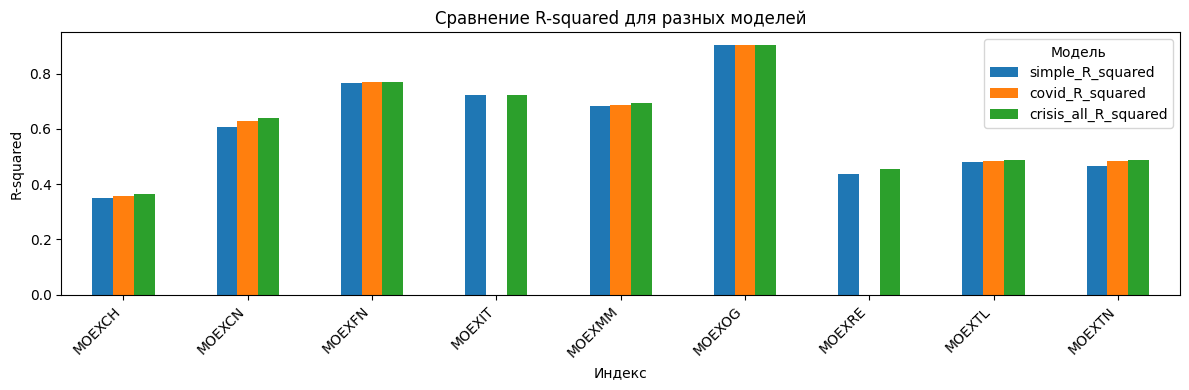

In [ ]:
# Создание графика
comparison_R_squared.plot(kind='bar', figsize=(12, 4))
plt.title('Сравнение R-squared для разных моделей')
plt.xlabel('Индекс')
plt.ylabel('R-squared')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Модель')
plt.tight_layout()
plt.show()

            beta  beta_covid  beta_crisis
MOEXTN  0.508352    0.808199     0.951809
MOEXFN  0.869809    1.015562     1.027784
MOEXCH  0.382236    0.426258     0.616407
MOEXMM  0.704999    0.673035     0.856543
MOEXTL  0.740471    0.548902     0.686131
MOEXCN  0.441555    0.591598     0.818203
MOEXOG  0.982491    0.982491     0.887901
MOEXIT  0.574296    0.574296     0.729512
MOEXRE  0.240925    0.240925     0.602054


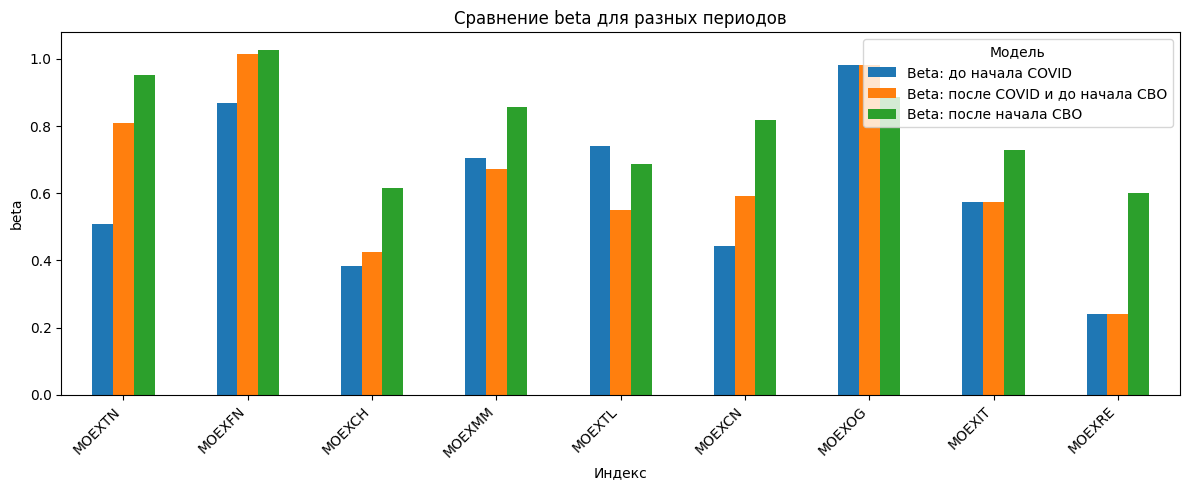

In [ ]:
# Расчет beta для каждого периода из модели с учетом структурных разрывов

# Замена NaN на 0 для корректного суммирования
capm_rub_crisis_all = capm_rub_crisis_all.fillna(0)
capm_rub_crisis_all['beta_covid'] = capm_rub_crisis_all['beta'] + capm_rub_crisis_all['mp:post_covid']
capm_rub_crisis_all['beta_crisis'] = capm_rub_crisis_all['beta_covid'] + capm_rub_crisis_all['mp:crisis_22']

# Вывод результатов
print(capm_rub_crisis_all[['beta', 'beta_covid', 'beta_crisis']])

comparison_beta = capm_rub_crisis_all[['beta', 'beta_covid', 'beta_crisis']]
# Создание графика
comparison_beta.plot(kind='bar', figsize=(12, 5))
plt.title('Сравнение beta для разных периодов')
plt.xlabel('Индекс')
plt.ylabel('beta')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Модель', labels=['Beta: до начала COVID', 'Beta: после COVID и до начала СВО', 'Beta: после начала СВО'], fontsize=10)
plt.tight_layout()
plt.show()

MOEXIT и MOEXRE до начала COVID не рассматривали (нет данных), структурный разрыв "до и после COVID" для этих индексом не анализировали, поэтому данные "до" и "после" COVID для этих индексов совпадают.

**Вывод**

1. **Даже при незначительном улучшении R-squared, существенное изменение значений бета-коэффициентов после учёта структурных сдвигов (COVID-19 и начало СВО) указывает на значительное изменение взаимосвязи между доходностью отраслевых индексов и рыночной премией в эти периоды.**  Незначительное улучшение R-squared может быть связано с тем, что модель все еще не полностью учитывает все факторы, влияющие на доходность индексов, но изменение бета-коэффициентов показывает, что эти структурные сдвиги внесли значительные изменения в чувствительность индексов к рыночным колебаниям.

  Другими словами, хотя модель не стала значительно "точнее" в предсказании доходности (R-squared изменилось незначительно), она стала значительно "лучше" в описании того, как изменилась зависимость доходности от рынка в результате кризисных событий.  Это важное наблюдение, поскольку оно указывает на изменение рыночной динамики и может быть использовано для более точного прогнозирования в будущем, с учетом этих структурных сдвигов.  Простое использование R-squared в качестве единственного критерия оценки модели в данном случае было бы неполным и вводящим в заблуждение.  Необходимо учитывать и изменения в  параметрах модели.

2. Анализ изменения бета-коэффициентов показывает, что **сектора российской экономики по-разному реагировали на кризисы, вызванные пандемией COVID-19 и началом СВО.**  Транспорт, потребительский сектор и строительство продемонстрировали наибольшее повышение чувствительности к рыночным колебаниям.  Сектор металлов и добычи продемонстрировал  более высокую чувствительность к геополитическим факторам.  Эти изменения отражают сложное взаимодействие между макроэкономической средой, отраслевыми особенностями и геополитическими рисками.

## Исследование 3. анализ корреляций и главных компонент




После того, как мы определились с выбором наилучшего предиктора и периода относительной стабильной, мы решили провести обратный анализ и определить, от чего зависят изменения самого индекса MOEX.
Дополнительно мы посмотрели варианты формирования портфеля индексов таким образом, чтобы превзойти MOEX с точки зрения Risk-Return путем Mean-Variance анализа

Для этого мы провели несколько шагов:
1. Корреляционный анализ
2. Проведение PCA
3. Многопеременная регрессия
4. Ввиду высокой корреляции отраслевых индексов, а также взаимосвязи индекса IMOEX c отраслевыми была предложена гипотеза - возможность превысить доходность IMOEX путем составления эффективного портфеля из отраслевых индексов с применением теории Markowitz Mean-Variance Analysis и подбором наиболее эффективного портфеля индексов для превышения доходности IMOEX с сохранением целевой волатильности.


Correlation matrix of indexes:
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|        | MOEXTN | MOEXFN | MOEXCH | MOEXOG | MOEXMM | MOEXTL | MOEXCN | MOEXIT | MOEXRE |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| MOEXTN |  1.0   | 0.669  | 0.441  | 0.626  | 0.598  | 0.545  | 0.654  | 0.771  | 0.653  |
| MOEXFN | 0.669  |  1.0   | 0.499  | 0.774  | 0.698  | 0.619  | 0.721  | 0.827  | 0.661  |
| MOEXCH | 0.441  | 0.499  |  1.0   | 0.574  | 0.565  | 0.387  | 0.499  | 0.586  | 0.456  |
| MOEXOG | 0.626  | 0.774  | 0.574  |  1.0   | 0.749  | 0.646  | 0.703  | 0.764  | 0.602  |
| MOEXMM | 0.598  | 0.698  | 0.565  | 0.749  |  1.0   | 0.595  | 0.689  | 0.758  | 0.612  |
| MOEXTL | 0.545  | 0.619  | 0.387  | 0.646  | 0.595  |  1.0   | 0.626  | 0.621  | 0.561  |
| MOEXCN | 0.654  | 0.721  | 0.499  | 0.703  | 0.689  | 0.626  |  1.0   | 0.813  | 0.692  |
| MOEXIT | 0.771  | 0.827  | 0.586  | 0.764  | 0.

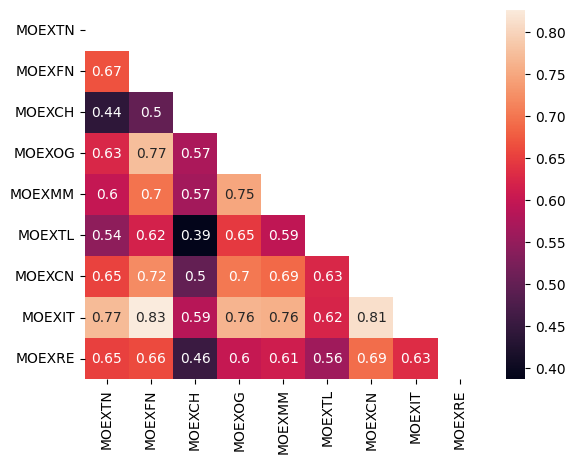

In [ ]:
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# формируем начальнй датасет для оценки корреляции ндексов между собой
idx3 = data.loc[:,'MOEXTN':'MOEXRE'].columns

#переводим цены в логарифмы доходностей
log_rub = np.log(data.loc[:,idx3])
returns = log_rub.diff().loc[1:]

# матрица корреляции активов
corr = returns.corr()

# выведем матрицу корреляции индексов между собой
mask = np.triu(np.ones_like(corr, dtype=bool))
dataplot = sns.heatmap(corr, annot=True, mask=mask)

# выводим результаты первого пункт по оценке корреляции
print("Correlation matrix of indexes:")
print(tabulate(np.round(corr, 3), headers='keys', tablefmt='pretty'))
plt.show()


**Вывод из значений корреляционной матрицы**

Наблюдаем достаточно высокие коэффициенты корреляции, что свидетельствует о большой подверженности отраслевых индексов общему, систематическому, риску.
Корреляционный анализ показал высокую степень взаимосвязи индексов - (минимальный коэффициент корреляции составил 0.39, максимальный - 0.83, что говорит о очень высокой корреляции) был проведен анализ главных компонент.

Воспользуемся PCA для того, чтобы квантифицировать динамику
и природу этого систематического риска.

Наша задумка в следующем: в случае, если большая доля дисперсиии индексов объясняется одной главной компонентой, то это можно считать "истинным" индексом широкого рынка для CAPM. произведя обратное преобразование над этой главной компонентой, мы сможем увидеть, из чего этот рыночный портфель состоит.

Determination of optimal PC numbers:


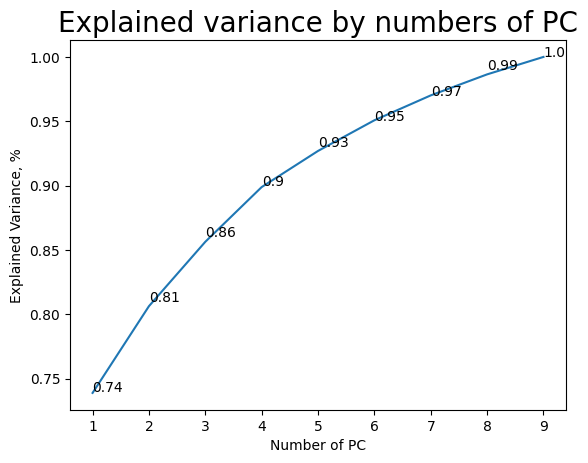

In [ ]:
 # наблюдается очень высокая корреляция индексов между собой, попробуем провести PCA для описания MOEX методом главных компонент
# формируем dataset и убираем значения NaN
returns['IMOEX'] = mkt_rub
returns.dropna(inplace=True)

# в качестве исходных рядов принимаем все ряды отраслевых индексов
X = returns.loc[:,'MOEXTN':'MOEXRE']
y = returns['IMOEX']

# проводим нормлизацию в интервале -1 - 1
sc = StandardScaler()
X_pca = sc.fit_transform(X)

# оценим количество главных компонент для оптимального описания выборки
# переберем количество компонент от 2 до 9 (количество индексов)
exp_variance = []
number_PC = []
for i in range(1, 10):
  pca = PCA(n_components=i)
  X_pca = sc.fit_transform(X)
  X_pca = pca.fit_transform(X_pca)
  explained_variance = sum(pca.explained_variance_ratio_)
  exp_variance.append(explained_variance)
  number_PC.append(i)

# построим график для оценки эффективности увеличения главных компонент
plt.plot(number_PC, exp_variance)
plt.title('Explained variance by numbers of PC', fontsize=20)
plt.xlabel('Number of PC')
plt.ylabel('Explained Variance, %')
for a,b in zip(number_PC, np.round(exp_variance, 2)):
    plt.text(a, b, str(b))
print("Determination of optimal PC numbers:")
plt.show()

**Вывод**

Согласно проведенному анализу видно, что **даже одна компонента описывает дисперсию индекса на 74%, что позволяет говорить о его "истинности" для CAPM.**

Выведем собственные значения, чтобы понять состав PC1.

In [ ]:
pca = PCA(n_components=1)
X_pca = sc.fit_transform(X)
X_pca = pca.fit_transform(X_pca)
explained_variance = sum(pca.explained_variance_ratio_)
coeff = pca.components_.T * np.sqrt(pca.explained_variance_)
for i in range(len(idx)+1):
  print(str(coeff[i]) + " * " + idx3[i])

[0.8999343] * MOEXTN
[0.91974123] * MOEXFN
[0.70635107] * MOEXCH
[0.91475009] * MOEXOG
[0.90553398] * MOEXMM
[0.79327253] * MOEXTL
[0.91963084] * MOEXCN


Данный рыночный портфель с высокой степенью точности описывает поведение индекса MOEX. При использовании одной компоненты дисперсия индекса описывается с точностью 74%, двух главных компонент описывается 80% дисперсии доходности IMOEX.

Дополнительно попробуем посмотреть, с какой степенью точности регрессия на двух компонентах PCA (т.к. они описывают более 80-ти% дисперсии, что является принятым "стандартом" качества) позволит описать поведение индекса MOEX.

PCA with 2 components allow to explain 0.8062327421792783 of total variance
OLS on two PC results:
                            OLS Regression Results                            
Dep. Variable:                  IMOEX   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     5728.
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:58:20   Log-Likelihood:                 3613.8
No. Observations:                 961   AIC:                            -7222.
Df Residuals:                     958   BIC:                            -7207.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

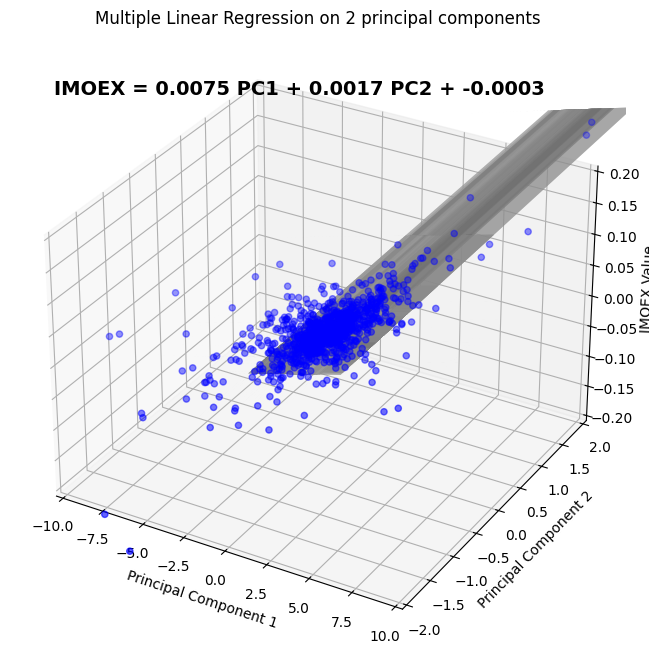

In [ ]:
# 80% дисперсии описывается с применением двух компонент - построим регрессию для оценки качества прогноза
n_comp = 2
pca = PCA(n_components=n_comp)
X_pca = sc.fit_transform(X)
X_pca = pca.fit_transform(X_pca)
X_pca = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1]})
X_pca['IMOEX'] = y.to_numpy()
explained_variance = pca.explained_variance_ratio_
print(f"PCA with {n_comp} components allow to explain {np.sum(explained_variance)} of total variance")

y_pca = smf.ols(formula='IMOEX ~ PC1 + PC2', data = X_pca).fit()


pca_results = pd.DataFrame(None, index=idx3, columns=['alpha',
                                                  'beta',
                                                  'alpha_pvalue',
                                                  'beta_pvalue',
                                                  'R_squared'])
# выведем оценку регрессии
print("OLS on two PC results:")
print(y_pca.summary())

# построим результаты с поверхностью регрессии
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = X_pca['PC1']
y = X_pca['PC2']
z = X_pca['IMOEX']
ax.scatter(x, y, z, color='blue')
A = np.vstack([x, y, np.ones_like(x)]).T
plane_coef, _, _, _ = np.linalg.lstsq(A, z, rcond=None)
x_plane, y_plane = np.meshgrid(x, y)
z_plane = y_pca.params['PC1'] * x_plane + y_pca.params['PC2'] * y_plane + y_pca.params['Intercept']
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.3, color='lightgrey', edgecolor='none')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('IMOEX Value')
ax.set_xlim(-10, 10)
ax.set_ylim(-2, 2)
ax.set_zlim(-0.2, 0.2)
plt.title(f'Multiple Linear Regression on {n_comp} principal components')
ax.text(-15, -0.5, 0.3, f'IMOEX = {y_pca.params.PC1:.4f} PC1 + {y_pca.params.PC2:.4f} PC2 + {y_pca.params.Intercept:.4f}', color='black', fontsize = 14, weight = 'bold')
print("Regression with PCA:")
plt.show()

Многопеременная регрессия с применением двух компонент позволяет достичь коэффициента $R^2_{adj}$ = 0.933.

**Гипотеза об "истинности" индекса для CAPM подтверждается с высокой степенью уверенности.**

Ввиду высокой скоррелированности индексов между собой, а следовательно и отсутствия возможности снизить системный риск путем индексного инвестирования в IMOEX попробуем сформировать портфель отраслевых индексов, чтобы "обогнать" IMOEX по доходности с сохранением того же уровня волатильности.

In [ ]:
import random

# попробуем оценить возможность "обогнать" индекс
# восстановим начальный массив
log_rub = np.log(data.loc[:,idx3])
returns = log_rub.diff().loc[1:]
index_weights = {}

# построим матрицу стандартных отклонений
std = returns.std() * np.sqrt(365)

# матрица умноженных стандартных отклонений
std_mult = corr.copy()
for i in range(len(idx3)):
  std_mult[idx3[i]] = std * std[i]

# итоговая матрица variance в виде corr * std1 * std2
variance = (std_mult * corr).to_numpy()

# безрисковая ставка в виде RUONIA на последний месяц
rf = data['ruonia'].iloc[-1]

# риск-премия принята на уровне 5%
exp_returns = rf + capm_rub_for_portfolio['alpha'] + capm_rub_for_portfolio['beta'] * 0.05
index_return = rf + 0.05
index_std = np.std(mkt_rub) * np.sqrt(365)
exp_returns = exp_returns.to_numpy()

# случайное распределение весов для кейсов
iter = 100000
weights = np.random.rand(iter, len(idx3))

for i in range(len(weights)):
    s = np.sum(weights[i])
    for j in range(len(weights[i])):
        weights[i][j] = weights[i][j] / s

exp_returns = np.resize(exp_returns,(len(weights), len(idx3)))
cases_returns = np.arange(float(iter))
cases_variance = np.arange(float(iter))
for i in range(iter):
    cases_returns[i] = np.dot(weights[i], exp_returns[i])
    cases_variance[i] = np.sqrt(weights[i].dot(variance).dot(np.transpose(weights[i])))
    index_weights[i] = weights[i]

# построим результаты mean-variance анализа
risk_return = pd.DataFrame({'Variance':cases_variance,
                            'Returns':cases_returns})

index_weights = pd.DataFrame.from_dict(index_weights, orient='index', columns=idx3)
risk_return = pd.concat([risk_return, index_weights], axis=1)
risk_return['Sharpe'] = risk_return['Returns'] / risk_return['Variance']

best_portfolio = risk_return.loc[risk_return['Sharpe'].idxmax()]

fig = px.scatter(risk_return, x='Variance', y='Returns', color='Returns', width=800, height=400)
fig.add_scatter(x=[index_std], y=[index_return], marker=dict(color='red', size=14, symbol='star-dot'), name='IMOEX')

fig.show()

<ipython-input-33-398d5d5a9222>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  std_mult[idx3[i]] = std * std[i]


**Вывод**

При том же уровне волатильности собранные индексные портфели не позволяют достичь той же дохости, что и широкий индекс MOEX. Это связано с:
1. Низкими значениями $β$
2. Отсутствием возможности подбирать веса для отдельных активов, а только для индексов, что ограничивает "широту" портфеля индексов
3. высокой степенью корреляции между собой

Таким образом, **гипотеза о возможности "перебить" широкий индекс портфелем из индексов является неподтвержденной.**

## Исследование 4. Добавление товарных индексов

Мы также решили проанализировать, от каких насколько сильно сам индекс фондового рынка зависит от динамики мировых товаров и валют. Мотивация данного анализа в следующем: существует сильная зависимость индекса от товаров/валют, то предсказательную силу CAPM можно было бы повысить, добавив туда макроданные.

Мы добавили индексы на товары, которые составляют существенную долю Российского экспорта/импорта и сделали анализ корреляций, а также разбили данные на главные компоненты. Дополнительно были рассмотрены валютны пары USD/RUB и CNY/RUB, а также курс BTC/USD для оценки степени его потенциального влияния на Российский рынок

**Новые переменные в Исследовании 4 ниже**

* **BRENT** - цена нефти Brent в долларах США за баррель.

* **GOLD** - цена грамма золота согласно ЦБ России в рублях.

* **BTC** - цена закрытия биткоина в рублях.

* **SILVER** - цена грамма серебра согласно ЦБ России в рублях.

* **USDRUB** - курс ЦБ доллара к рублю на рассматриваемую дату.

* **CNYRUB** - курс ЦБ юаня к рублю на рассматриваемую дату.

In [ ]:
add_data = pd.read_excel('Add_Data.xlsx').dropna(how='all', axis=1)
add_data.head(5)

TRADEDATE  BRENT     GOLD            BTC  SILVER    USDRUB   CNYRUB
0 2024-12-18  73.39  8789.27  100917.196050  101.51  102.9979  13.9613
1 2024-12-17  73.19  8798.03  107507.500945  101.69  102.9125  13.8603
2 2024-12-16  73.91  8926.44  105961.289305  106.01  103.4305  14.0096
3 2024-12-15    NaN  8926.44  104298.695800  106.01  103.4305  14.0096
4 2024-12-14    NaN  8926.44  101144.187601  106.01  103.4305  14.0096

In [ ]:
# мерджим к новым данным исходный датафрейм по дате
add_data = add_data.merge(data, how='left', on='TRADEDATE').dropna(how='any', axis=0)
predict_list = ['BRENT','GOLD','BTC',]
add_data = add_data.loc[:, 'BRENT':'IMOEX']
add_idx = add_data.loc[:, 'BRENT':'CNYRUB'].columns

# получаем датафрейм дозодностей по товарам
add_log_rub = np.log(add_data)
add_return = add_log_rub.diff().loc[1:]
numerical_summary = add_return.describe().T
numerical_summary = numerical_summary[['min', 'max', 'mean', '50%']]
numerical_summary.columns = ['Min', 'Max', 'Mean', 'Median']

# выведем статистику по доходностям товаров и курсов валют (дневные изменения)
print("Summary statistics for numerical variables:")
print(tabulate(numerical_summary, headers='keys', tablefmt='pretty'))

Summary statistics for numerical variables:
+--------+----------------------+---------------------+------------------------+-------------------------+
|        |         Min          |         Max         |          Mean          |         Median          |
+--------+----------------------+---------------------+------------------------+-------------------------+
| BRENT  | -0.13852249032965158 | 0.1231469397762579  | -0.0004244339427812469 | -0.0020371384317661168  |
|  GOLD  | -0.1620531494866455  | 0.09089599623043298 | -0.0007912669119837666 | -0.00041324383254437436 |
|  BTC   | -0.20815803452096304 | 0.29011730172247496 | -0.001537198381175403  | -0.0003116328477705821  |
| SILVER | -0.14471252720974093 | 0.09669982185159132 | -0.0005879315225068386 |  -0.000416090793980306  |
| USDRUB | -0.12431322983169579 | 0.08258392681248505 | -0.0003875150434473741 | -0.0001886152872900837  |
| CNYRUB | -0.12600674218915486 | 0.08260783492810075 | -0.0002450526123758627 | -3.9707105302433376

Оценим взаимосвязь MOEX с каждым из товаров

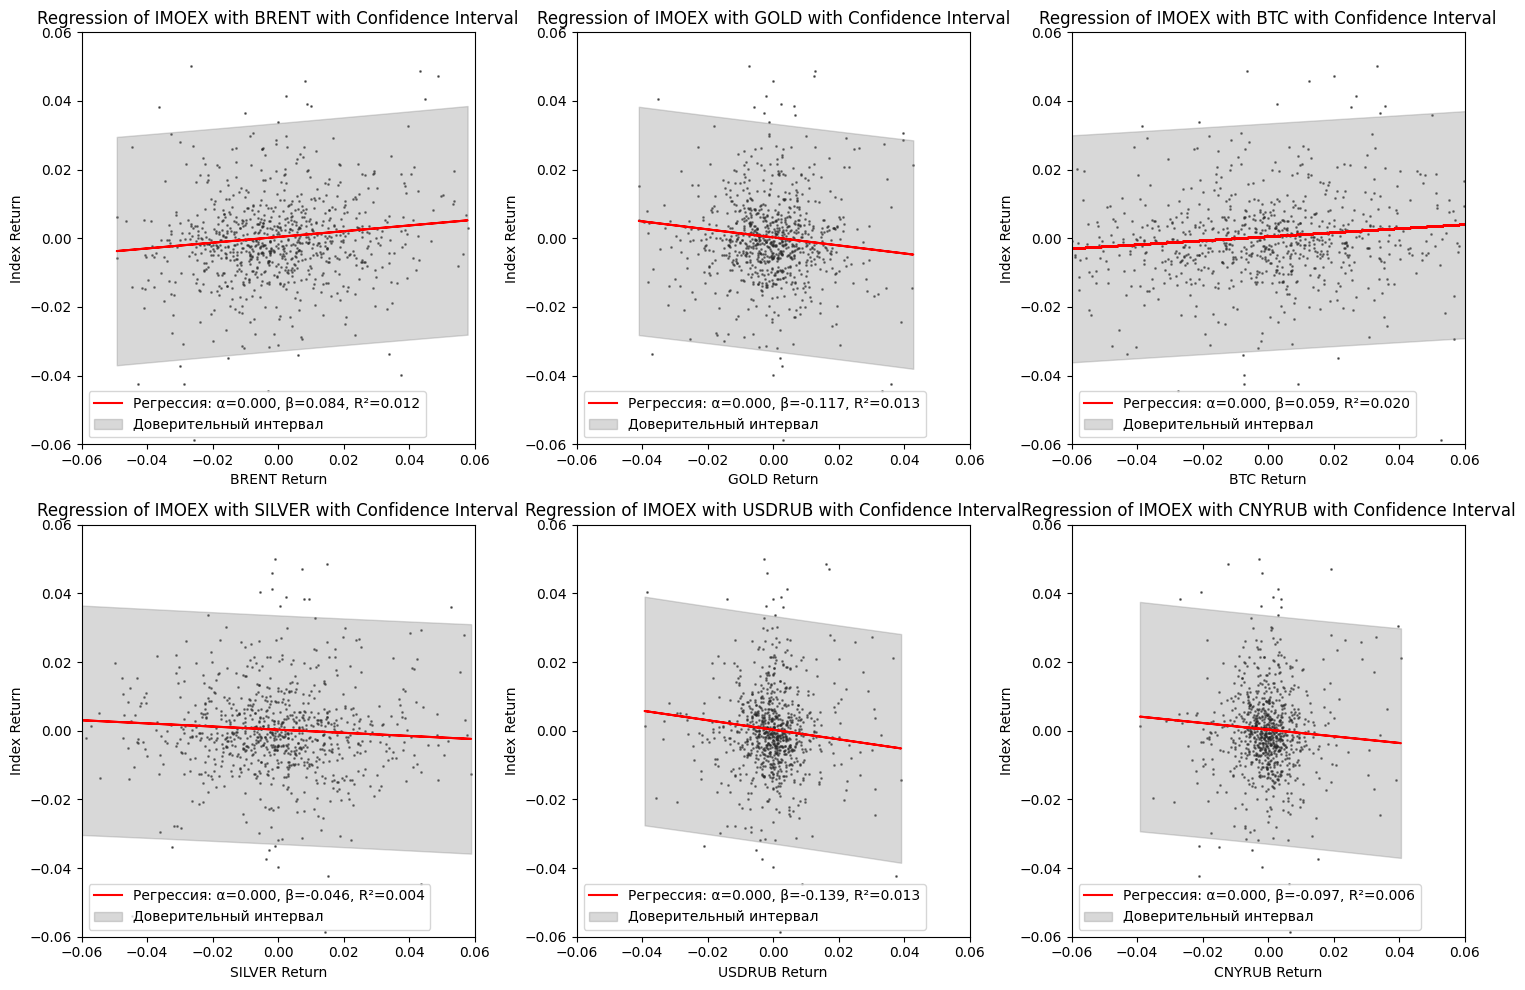

predictors p-value:
BRENT     0.001441
GOLD      0.000756
BTC       0.000028
SILVER    0.059738
USDRUB    0.000925
CNYRUB    0.019696
dtype: float64


In [ ]:
# Подготовка графиков
num_plots = len(add_idx)
num_cols = 3  # Количество столбцов
num_rows = (num_plots + num_cols - 1) // num_cols  # Количество строк, чтобы разместить все графики

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))  # Увеличиваем размер для лучшей видимости
axs = axs.flatten()  # Упрощаем доступ к осям
comdty_pvalues = pd.Series(None, index = add_idx)
for i, s in enumerate(add_idx):

    # Фильтрация данных
    almost_all = add_return.loc[(add_return[s] >= add_return[s].quantile(0.01)) &
                                 (add_return[s] <= add_return[s].quantile(0.99))]

    # Предсказания и доверительные интервалы
    predictions = smf.ols(f'IMOEX ~ {s}', add_return, missing='drop').fit().get_prediction(almost_all[f'{s}'])
    pred_int = predictions.summary_frame(alpha=0.05)
    model = smf.ols(f'IMOEX ~ {s}', add_return, missing='drop').fit()
    alpha = model.params['Intercept']
    beta = model.params[s]
    r_squared = model.rsquared
    comdty_pvalues[s] = model.pvalues[s]
    # Построение графика
    axs[i].scatter(almost_all[s], almost_all['IMOEX'], color="black", s=1, alpha=0.5)
    axs[i].plot(almost_all[f'{s}'],
                model.predict(almost_all[f'{s}']),
                color='red',
                label=f'Регрессия: α={alpha:.3f}, β={beta:.3f}, R²={r_squared:.3f}')
    # Доверительный интервал
    axs[i].fill_between(almost_all[f'{s}'].sort_values(),
                        pred_int['obs_ci_lower'][almost_all[f'{s}'].argsort()],
                        pred_int['obs_ci_upper'][almost_all[f'{s}'].argsort()],
                        color='gray', alpha=0.3, label='Доверительный интервал')
    axs[i].set_ylim(-0.06, 0.06)
    axs[i].set_xlim(-0.06, 0.06)
    axs[i].set_xlabel(f'{s} Return')
    axs[i].set_ylabel('Index Return')
    axs[i].set_title(f'Regression of IMOEX with {s} with Confidence Interval')  # Заголовок меняется для каждого индекса
    axs[i].legend()

# Удаляем пустые подграфики, если они есть
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axs[j])

plt.tight_layout()  # Автоматическая подгонка для предотвращения наложения
plt.show()
print('predictors p-value:')
print(comdty_pvalues)

**Вывод**

По результатам проведенного анализа наблюдаеются низкие значения $R^2$ для всех предложенных товарных и валютных позиций. Регрессия на серебро статистически - незначима (p-value > 0.5). При этом курс Биткоина объясняет наибольшую долю дисперсии среди предикторов. С учетом того, что Российская федерация с основном - сырьевая и экспортная экономика, выводы выглядят контр-интуитивными. Скорее всего имеет место лаговая и/или нелинейная динамики индекса Московской биржы от изменения стоимости товаров и валют. **Курс биткоина скорее всего имеет такую же зависимость от внешних факторов, как и котировки фондовых рынков в развивающихся странах** (растет в случае перетока ликвидности в более рискованные активы и падает при снижении деловой активности). Поэтому мы считаем, что прогнозировать цены на акции с помощью котировок биткоина не вполне корректно, скорее верно другое - и те и другие зависят от каких-то третьих факторов.


**Для оценки возможности совместного описания индекса товарными и валютными позициями был проведен корреляционный анализ и анализ по методу главных компонент.**

Correlation matrix with comodities and FX:
+--------+-------+--------+-------+--------+--------+--------+--------+
|        | BRENT |  GOLD  |  BTC  | SILVER | USDRUB | CNYRUB | IMOEX  |
+--------+-------+--------+-------+--------+--------+--------+--------+
| BRENT  |  1.0  | 0.052  | 0.138 |  0.11  | 0.086  | 0.094  | 0.108  |
|  GOLD  | 0.052 |  1.0   | 0.078 | 0.739  | 0.843  | 0.821  | -0.114 |
|  BTC   | 0.138 | 0.078  |  1.0  | 0.076  | 0.106  |  0.12  | 0.142  |
| SILVER | 0.11  | 0.739  | 0.076 |  1.0   | 0.632  | 0.603  | -0.064 |
| USDRUB | 0.086 | 0.843  | 0.106 | 0.632  |  1.0   | 0.907  | -0.112 |
| CNYRUB | 0.094 | 0.821  | 0.12  | 0.603  | 0.907  |  1.0   | -0.079 |
| IMOEX  | 0.108 | -0.114 | 0.142 | -0.064 | -0.112 | -0.079 |  1.0   |
+--------+-------+--------+-------+--------+--------+--------+--------+


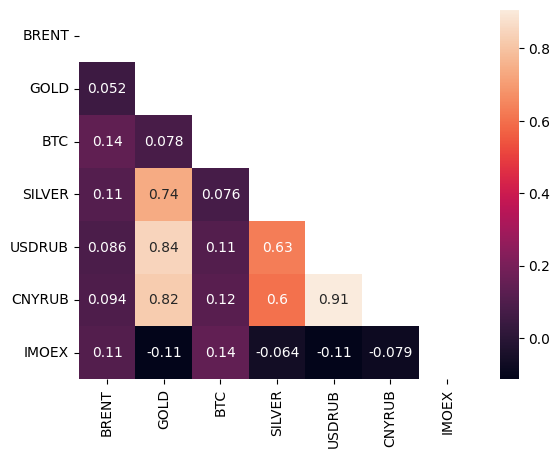

In [ ]:
#строим матрицу корреляции позици между собой
add_corr = add_return.corr()
mask = np.triu(np.ones_like(add_corr, dtype=bool))
dataplot = sns.heatmap(add_corr, annot=True, mask=mask)

print("Correlation matrix with comodities and FX:")
print(tabulate(np.round(add_corr, 3), headers='keys', tablefmt='pretty'))
plt.show()

Determination of optimal PC numbers:


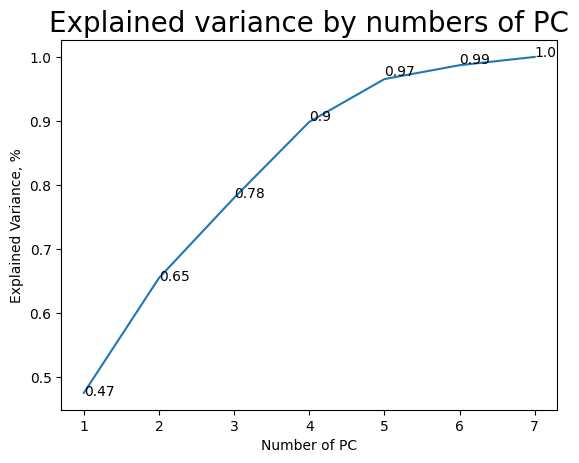

In [ ]:
#подбираем оптмимальное количество главных комонент для описания индекса
X = add_return.loc[:, :'IMOEX']
y = add_return['IMOEX']

sc = StandardScaler()
X_pca = sc.fit_transform(X)

exp_variance = []
number_PC = []
for i in range(1, 8):
  pca = PCA(n_components=i)
  X_pca = sc.fit_transform(X)
  X_pca = pca.fit_transform(X_pca)
  explained_variance = sum(pca.explained_variance_ratio_)
  exp_variance.append(explained_variance)
  number_PC.append(i)

# построим график для оценки эффективности увеличения главных компонент
plt.plot(number_PC, exp_variance)
plt.title('Explained variance by numbers of PC', fontsize=20)
plt.xlabel('Number of PC')
plt.ylabel('Explained Variance, %')
for a,b in zip(number_PC, np.round(exp_variance, 2)):
    plt.text(a, b, str(b))
print("Determination of optimal PC numbers:")
plt.show()

Оптимальным числом главных компонент для достаточной точности описания дисперсии является 3 (~80% дисперсии).

In [ ]:
n_comp = 3
pca = PCA(n_components=n_comp)
X_pca = pca.fit_transform(X_pca)
X_pca = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'PC3': X_pca[:, 1]})
X_pca['IMOEX'] = y.to_numpy()

explained_variance = pca.explained_variance_ratio_
print(f"PCA with {n_comp} components allow to explain {np.sum(explained_variance)} of total variance")

y_pca = smf.ols(formula='IMOEX ~ PC1 + PC2 + PC3', data = X_pca).fit()


pca_results = pd.DataFrame(None, index=add_idx, columns=['alpha',
                                                  'beta',
                                                  'alpha_pvalue',
                                                  'beta_pvalue',
                                                  'R_squared'])
# выведем оценку регрессии
print("OLS on two PC results:")
print(y_pca.summary())

PCA with 3 components allow to explain 0.779850408757332 of total variance
OLS on two PC results:
                            OLS Regression Results                            
Dep. Variable:                  IMOEX   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     366.8
Date:                Thu, 26 Dec 2024   Prob (F-statistic):          6.03e-116
Time:                        18:58:35   Log-Likelihood:                 2562.1
No. Observations:                 864   AIC:                            -5118.
Df Residuals:                     861   BIC:                            -5104.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

**Вывод**

Проведенная многопараметрическая регрессия, как и по отдельным компонентам, обладает низким итоговым коэффициентом $R^2_{adj}$ с индексом MOEX. Таким образом **мы убедились в том, что бОльшую долю систематического фондового риска нельзя объяснить товарными/валютными показателями.** Это означает, что CAPM, построенный с использованием MOEX в расчете market risk-premium является оптимальным подходом.

## Общий вывод по исследованиям

В ходе проведенных исследований была проанализирована эффективность использования индекса Московской биржи (MOEX) в модели CAPM для оценки инвестиционных проектов в России. Исследования охватывают различные аспекты, связанные с корректностью использования MOEX как индекса широкого рынка в модели CAPM для российских проектов, а также его зависимость от структурных изменений и влияние товарных и валютных индексов на фондовый рынок.

1. **Лучший индикатор для CAPM**:
    * Исследование показало, что индекс MOEX является более качественным предиктором для модели CAPM по сравнению с индексом S&P500. Это подтверждается более высокой предсказательной силой регрессий, основанных на MOEX, что делает его предпочтительным выбором для оценки инвестиционных проектов в России.

2. **Структурные сдвиги на фондовом рынке**:
    * Анализ показал, что коэффициенты бета для отраслевых индексов изменились в результате кризисов, таких как пандемия COVID-19 и начало военных действий в Украине. Это указывает на значительное изменение взаимосвязи между доходностью отраслевых индексов и рыночной премией в эти периоды, что подчеркивает важность учета структурных изменений при оценке рисков.

3. **Зависимость изменений индекса MOEX**:
    * Исследование выявило высокую корреляцию между отраслевыми индексами и индексом MOEX, что подтверждает гипотезу о возможности формирования эффективного портфеля для превышения доходности MOEX. Однако, в текущем исследовании не удалось получить портфель с показателями доходность-риск выше, чем у индекса MOEX, что подтверждается теоретическими выводами модели CAPM.

4. **Влияние товарных и валютных индексов**:
    * Анализ зависимости индекса MOEX от товарных и валютных индексов показал, что добавление этих переменных незначительно улучшает предсказательную силу модели CAPM. Это подтверждает, что MOEX остается оптимальным индикатором для оценки рыночного риска в российском контексте.

## Допущения и ограничения моделей, использованных в исследовании

1. В исследовании предполагалась линейная зависимость динамики котировок акций от индекса, а также индекса от товаров и валют. В действительности возможны лаговые и нелинейные взаимосвязи;

2. При оценке эффективности модели CAPM мы использовали отраслевые индексы вместо котировок акций. Таким образом мы отсекли часть идиосинкратических рисков, связанных с конкретными компаниями, но оставили риски, характерные соответствующим отраслям

3. Мы строили регрессию на достаточно большом отрезке времени (около 10 лет), предполагая неизменность коэффициентом α и β на всем отрезке истории. Хотя выводы из исследования 2 заставляют усомниться в данном допущении

4. Некоторые отраслевые индексы (ИТ и девелоперы) публикуются сравнительно недавно, поэтому глубина истории по ним - существенно ниже



## Заключение
В целом, результаты исследований подтверждают, что индекс MOEX является наиболее подходящим индикатором для применения в модели CAPM в России. Учет структурных изменений и анализ взаимосвязей с отраслевыми индексами позволяют более точно оценивать риски и доходности инвестиционных проектов. Однако, несмотря на высокую корреляцию с товарными и валютными индексами, их влияние на предсказательную силу модели остается ограниченным. Это подчеркивает необходимость дальнейших исследований для более глубокого понимания динамики российского фондового рынка и факторов, влияющих на его поведение.
